In [2]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
dat=pd.read_excel(r'Train_Mobile.xlsx')

In [12]:
dat.shape

(10714, 30)

In [13]:
dat.iloc[:,9:]

,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,...,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Aadhaar,Mobile
0,Public,2,0,Hypertension,68,8,<400,Normal,441.0,154.0,...,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,255359739586,8472699987
1,Walk,2,0,Diabetes,64,15,<100,Stage-02,NaN,121.0,...,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,173768459879,8196077529
2,Public,2,0,None,19,13,<300,Elevated,416.0,124.0,...,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,946476848585,4906688777
3,Car,2,0,Coronary Heart Disease,33,9,<200,Stage-01,410.0,98.0,...,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,566683705984,9027726334
4,Car,2,0,Diabetes,23,7,<400,Normal,390.0,21.0,...,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,900891537041,3463020741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10709,Car,8,2,Diabetes,20,14,<400,Normal,134.0,67.0,...,209.0,61.0,56.0,35,7,4000000.0,300000,0.0,465599946769,2584330315
10710,Car,8,2,None,42,4,<400,Normal,387.0,102.0,...,211.0,65.0,47.0,35,7,1500000.0,700000,NaN,407426393553,2409676645
10711,Public,8,2,Diabetes,59,3,<100,Stage-02,177.0,111.0,...,296.0,87.0,37.0,16,5,3000000.0,2100000,2.0,781965841698,4319272525
10712,Walk,8,2,Coronary Heart Disease,49,6,<300,Elevated,352.0,140.0,...,253.0,56.0,70.0,28,5,2900000.0,700000,1.0,204918389979,8665727767


In [14]:
# NEEDED
# Label Encoding
dat["Region"] = dat["Region"].astype('category').cat.codes
dat["Gender"] = dat["Gender"].astype('category').cat.codes
dat["Designation"] = dat["Designation"].astype('category').cat.codes
dat["Married"] = dat["Married"].astype('category').cat.codes
dat["Mode_transport"] = dat["Mode_transport"].astype('category').cat.codes
dat["Occupation"] = dat["Occupation"].astype('category').cat.codes
dat["Married"] = dat["Married"].astype('category').cat.codes
dat["comorbidity"] = dat["comorbidity"].astype('category').cat.codes
dat["Pulmonary score"] = dat["Pulmonary score"].astype('category').cat.codes
dat["cardiological pressure"] = dat["cardiological pressure"].astype('category').cat.codes


In [15]:
# Removing unnecessary fields
dat=dat.drop(["Name","Insurance", "salary", "people_ID", "Aadhaar", "Mobile"],  axis=1)

In [16]:
dat.isnull().sum()

Unnamed: 0                   0
Region                       0
Gender                       0
Designation                  0
Married                      0
Children                   311
Occupation                   0
Mode_transport               0
cases/1M                     0
Deaths/1M                    0
comorbidity                  0
Age                          0
Coma score                   0
Pulmonary score              0
cardiological pressure       0
Diuresis                   716
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
Charlson Index               0
Blood Glucose                0
FT/month                   723
dtype: int64

In [17]:
# Missing value handling using mean and forward fill methods
dat['Children']=dat['Children'].fillna(int(np.mean(dat['Children'])))
dat['Diuresis']=dat['Diuresis'].fillna(int(np.mean(dat['Diuresis'])))
dat['d-dimer']=dat['d-dimer'].fillna(int(np.mean(dat['d-dimer'])))
dat['Heart rate']=dat['Heart rate'].fillna(int(np.mean(dat['Heart rate'])))
dat['Platelets']=dat['Platelets'].fillna(int(np.mean(dat['Platelets'])))
dat['HDL cholesterol']=dat['HDL cholesterol'].fillna(int(np.mean(dat['HDL cholesterol'])))
dat['HBB']=dat['HBB'].fillna(int(np.mean(dat['HBB'])))
dat['FT/month']=dat['FT/month'].fillna(int(np.mean(dat['FT/month'])))
dat['comorbidity'].fillna('ffill', inplace=True)
dat['cardiological pressure'].fillna('ffill', inplace=True)

In [18]:
int(np.mean(dat['Children']))

1

In [19]:
# Training data 
y_train= dat.iloc[:,-1]
x_train= dat.iloc[:,9:].drop(["Infect_Prob"], axis=1)

KeyError: "['Infect_Prob'] not found in axis"

In [903]:
# (x-mu / sigma) scaling
from sklearn import preprocessing
sclr = preprocessing.StandardScaler()
x_scaled = sclr.fit_transform(x_train)
dat_x_train = pd.DataFrame(x_scaled)

In [904]:
dat_x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.469332,1.691367,-0.272711,1.336249,-0.419075,1.714180,1.656641,-0.420254,-1.022423,0.514382,0.515449,0.589446,1.418137,1.264823
1,-0.390963,1.430316,1.611645,-1.345259,1.342389,-0.007949,0.831730,-1.091334,1.275869,1.011664,1.475435,-1.270564,0.703701,-0.005454
2,1.329627,-1.506507,1.073257,0.442413,-1.299807,1.450050,0.906722,0.377787,-1.506274,0.159181,-0.924532,1.688543,0.703701,-0.005454
3,-1.251258,-0.592828,-0.003518,-0.451423,0.461657,1.386658,0.256793,0.921906,-0.006336,-0.764343,0.707446,0.589446,1.418137,-0.005454
4,-0.390963,-1.245456,-0.541905,1.336249,-0.419075,1.175354,-1.667999,0.667984,1.348447,-0.267061,1.091441,1.012176,1.418137,-0.005454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10709,-0.390963,-1.441244,1.342451,1.336249,-0.419075,-1.529339,-0.518123,-1.671727,-1.603044,-0.977464,0.323451,1.265813,1.418137,-1.275730
10710,1.329627,-0.005464,-1.349486,1.336249,-0.419075,1.143659,0.356782,0.323375,-1.554659,-0.693303,-0.540537,1.265813,1.418137,-0.005454
10711,-0.390963,1.104002,-1.618680,-1.345259,1.342389,-1.075035,0.581758,0.631709,0.501708,0.869584,-1.500524,-0.340559,-0.010736,1.264823
10712,-1.251258,0.451375,-0.811099,0.442413,-1.299807,0.773876,1.306679,-0.111920,-0.538572,-1.332665,1.667433,0.673992,-0.010736,-0.005454


In [905]:
x_train

,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month
0,2,68,8,3,1,441.0,154.0,93.0,233.0,82.0,58.0,27,7,2.0
1,1,64,15,0,3,278.0,121.0,56.0,328.0,89.0,68.0,5,6,1.0
2,3,19,13,2,0,416.0,124.0,137.0,213.0,77.0,43.0,40,6,1.0
3,0,33,9,1,2,410.0,98.0,167.0,275.0,64.0,60.0,27,7,1.0
4,1,23,7,3,1,390.0,21.0,153.0,331.0,71.0,64.0,32,7,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10709,1,20,14,3,1,134.0,67.0,24.0,209.0,61.0,56.0,35,7,0.0
10710,3,42,4,3,1,387.0,102.0,134.0,211.0,65.0,47.0,35,7,1.0
10711,1,59,3,0,3,177.0,111.0,151.0,296.0,87.0,37.0,16,5,2.0
10712,0,49,6,2,0,352.0,140.0,110.0,253.0,56.0,70.0,28,5,1.0


In [906]:
# PCA
data_reduced=dat[:1000]
x_train_reduced=x_train[:1000]
ncomp=6
pca_cov = PCA(n_components=ncomp)
principalComponents = pca_cov.fit_transform(x_train)

In [907]:
principaldf=pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4', '5', '6'])
#                           ,'principal component 3','principal component 4'])

In [908]:
print('Explained variation per principal component: {}'.format(pca_cov.explained_variance_ratio_))


Explained variation per principal component: [0.55962616 0.18990593 0.10700751 0.09964971 0.01466063 0.01237666]


In [910]:
y_train.values
criteria = [y_train.between(0, 33), y_train.between(33, 66), y_train.between(66, 100)]
values = ['Low', 'Mid', 'High']
y_categories = np.select(criteria, values, 0)
dat['y_category']=dat["y_category"].astype('category').cat.codes
dat

,Region,Gender,Designation,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month,Infect_Prob,y_category
0,1,0,1,1,1.0,4,1,2,0,2,...,154.0,93.0,233.0,82.0,58.0,27,7,2.0,49.135010,2
1,1,0,1,1,2.0,4,2,2,0,1,...,121.0,56.0,328.0,89.0,68.0,5,6,1.0,51.147880,2
2,1,0,1,0,1.0,1,1,2,0,3,...,124.0,137.0,213.0,77.0,43.0,40,6,1.0,73.224000,0
3,1,0,1,1,1.0,3,0,2,0,0,...,98.0,167.0,275.0,64.0,60.0,27,7,1.0,48.779225,2
4,1,0,1,0,2.0,6,0,2,0,1,...,21.0,153.0,331.0,71.0,64.0,32,7,1.0,87.868800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10709,0,1,0,0,2.0,0,0,8,2,1,...,67.0,24.0,209.0,61.0,56.0,35,7,0.0,41.981760,2
10710,0,1,0,1,0.0,6,0,8,2,3,...,102.0,134.0,211.0,65.0,47.0,35,7,1.0,47.148663,2
10711,0,1,0,1,0.0,2,1,8,2,1,...,111.0,151.0,296.0,87.0,37.0,16,5,2.0,47.708533,2
10712,0,1,0,1,1.0,5,2,8,2,0,...,140.0,110.0,253.0,56.0,70.0,28,5,1.0,53.803565,2


In [911]:
data_reduced=dat[:1000]

data_reduced
# data_reduced.notnull().any(axis = 0)

,Region,Gender,Designation,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month,Infect_Prob,y_category
0,1,0,1,1,1.0,4,1,2,0,2,...,154.0,93.0,233.0,82.0,58.0,27,7,2.0,49.135010,2
1,1,0,1,1,2.0,4,2,2,0,1,...,121.0,56.0,328.0,89.0,68.0,5,6,1.0,51.147880,2
2,1,0,1,0,1.0,1,1,2,0,3,...,124.0,137.0,213.0,77.0,43.0,40,6,1.0,73.224000,0
3,1,0,1,1,1.0,3,0,2,0,0,...,98.0,167.0,275.0,64.0,60.0,27,7,1.0,48.779225,2
4,1,0,1,0,2.0,6,0,2,0,1,...,21.0,153.0,331.0,71.0,64.0,32,7,1.0,87.868800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,1,1,1.0,5,0,2,0,3,...,143.0,183.0,243.0,71.0,69.0,5,4,1.0,49.709000,2
996,1,0,1,1,0.0,4,1,2,0,3,...,57.0,94.0,237.0,88.0,42.0,29,5,1.0,46.849669,2
997,1,0,1,0,0.0,2,1,2,0,2,...,151.0,171.0,343.0,66.0,45.0,39,7,0.0,92.750400,0
998,1,0,1,0,0.0,-1,0,2,0,0,...,60.0,115.0,349.0,61.0,44.0,25,3,1.0,42.958080,2


0        False
1        False
2        False
3        False
4        False
         ...  
10709    False
10710    False
10711    False
10712    False
10713    False
Name: y_category, Length: 10714, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
10709    False
10710    False
10711    False
10712    False
10713    False
Name: y_category, Length: 10714, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
10709    False
10710    False
10711    False
10712    False
10713    False
Name: y_category, Length: 10714, dtype: bool


/home/samhar25/Conda/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


<Figure size 432x288 with 0 Axes>

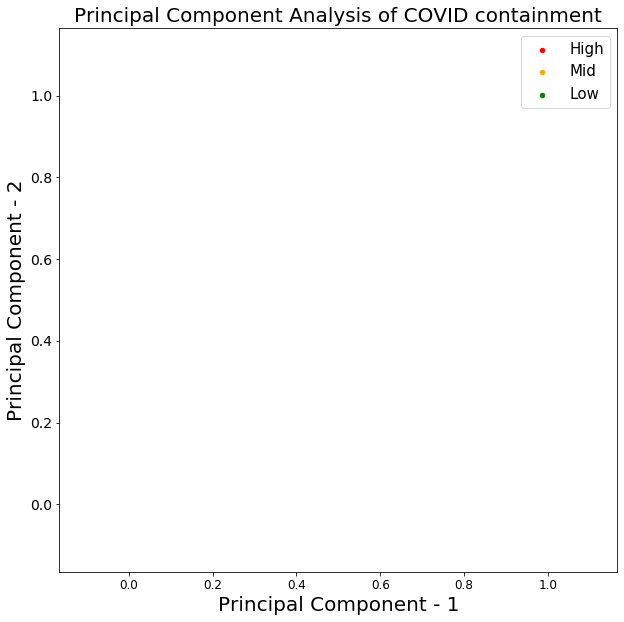

In [912]:
# Plot of Principal components
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of COVID containment",fontsize=20)
# data_reduced=dat[10000:]
targets = ['High','Mid','Low']
colors = ['r','orange', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = dat['y_category'] ==target
    print(indicesToKeep)
    plt.scatter(principaldf.loc[indicesToKeep, 'principal component 1']
               , principaldf.loc[indicesToKeep, 'principal component 2'], c = color, s = 20)

plt.legend(targets,prop={'size': 15})

In [913]:
dat_corr[dat_corr.columns[-14:]]

,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month
0,2,68,8,3,1,441.0,154.0,93.0,233.0,82.0,58.0,27,7,2.0
1,1,64,15,0,3,278.0,121.0,56.0,328.0,89.0,68.0,5,6,1.0
2,3,19,13,2,0,416.0,124.0,137.0,213.0,77.0,43.0,40,6,1.0
3,0,33,9,1,2,410.0,98.0,167.0,275.0,64.0,60.0,27,7,1.0
4,1,23,7,3,1,390.0,21.0,153.0,331.0,71.0,64.0,32,7,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10709,1,20,14,3,1,134.0,67.0,24.0,209.0,61.0,56.0,35,7,0.0
10710,3,42,4,3,1,387.0,102.0,134.0,211.0,65.0,47.0,35,7,1.0
10711,1,59,3,0,3,177.0,111.0,151.0,296.0,87.0,37.0,16,5,2.0
10712,0,49,6,2,0,352.0,140.0,110.0,253.0,56.0,70.0,28,5,1.0


In [914]:
# Generating correlation matrix
dat_corr= dat.drop(['y_category', 'Infect_Prob'], axis=1)
dat_med=dat_corr[dat_corr.columns[-14:]]
cm=dat_corr.corr(method='kendall')
cm_med=dat_med.corr()

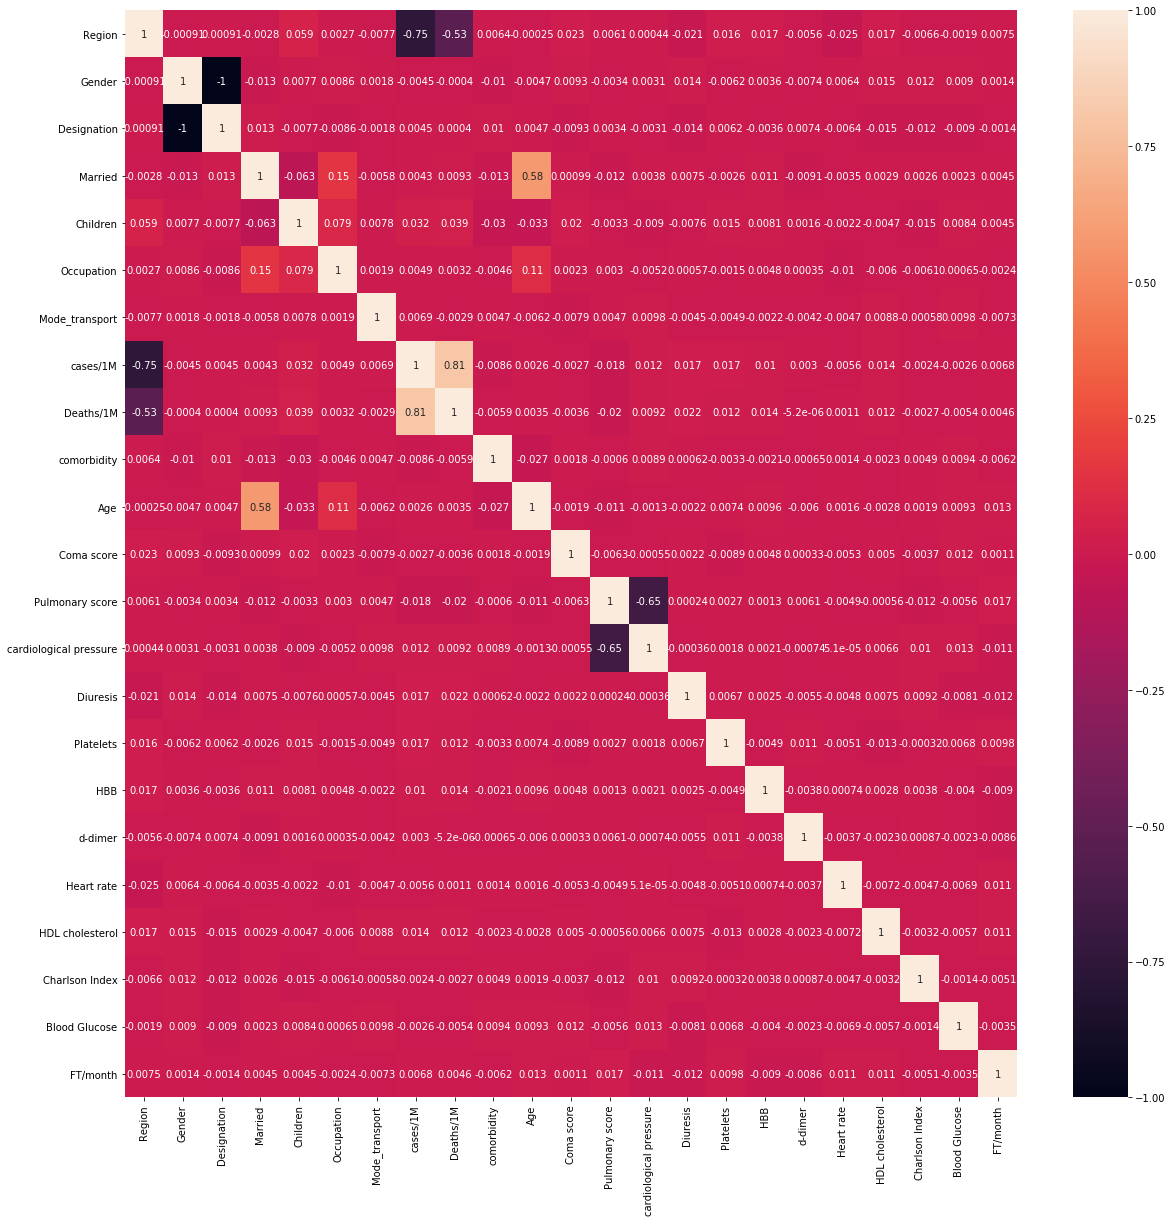

In [915]:
# Visualising correlation matrix
import seaborn as sn
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,20)) 
sn.heatmap(cm, annot=True)

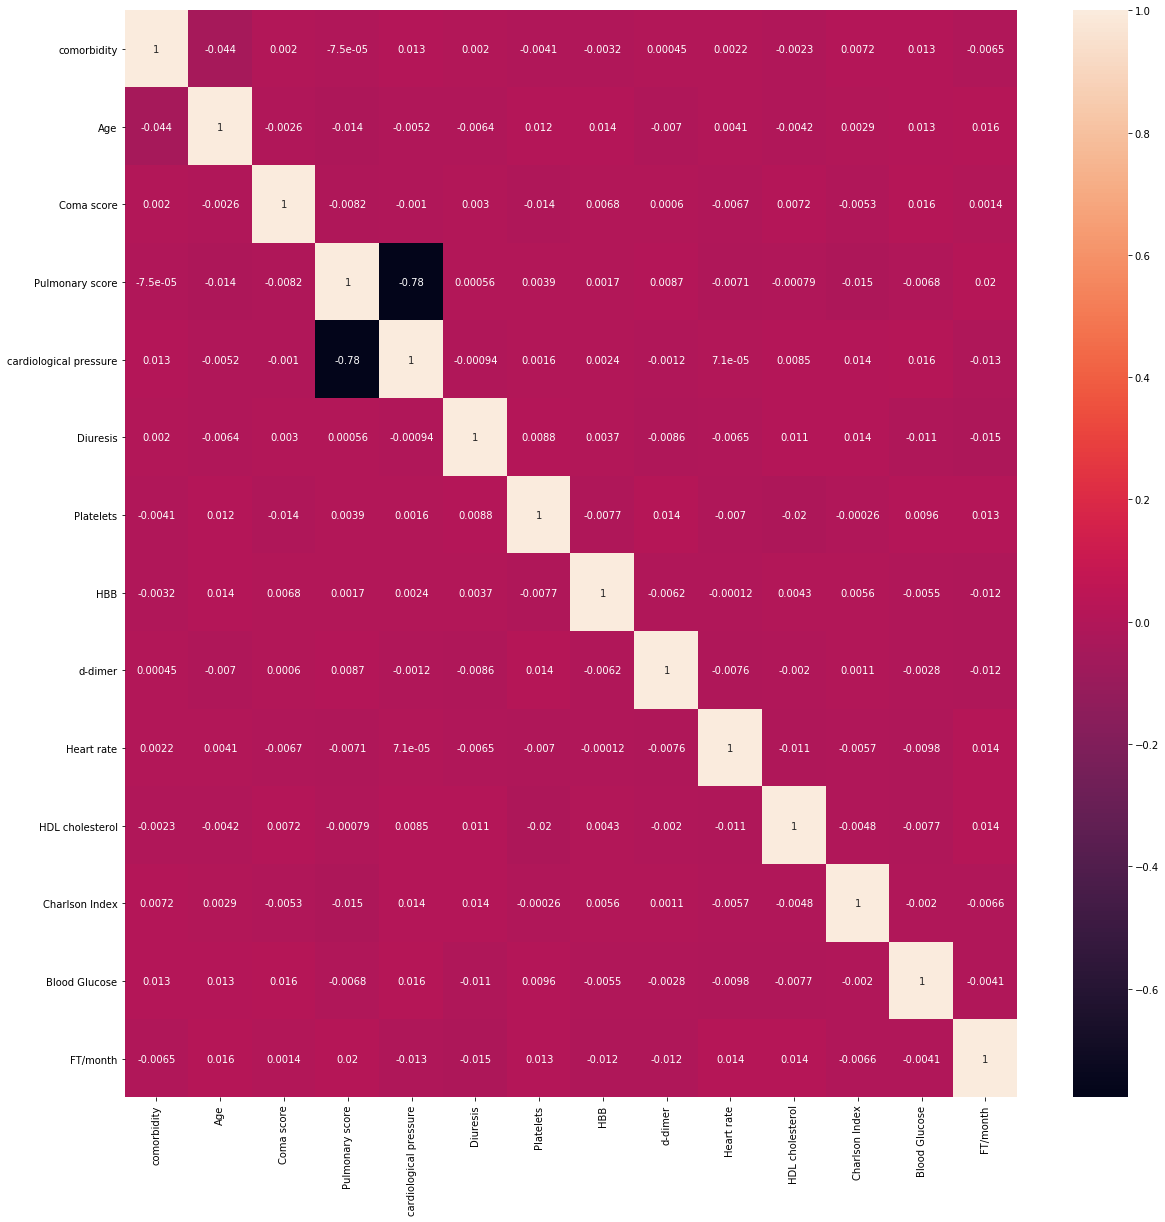

In [916]:
fig, ax = plt.subplots(figsize=(20,20)) 
sn.heatmap(cm_med, annot=True)

In [923]:
principaldf

,principal component 1,principal component 2,principal component 3,principal component 4,5,6
0,162.644279,23.926627,27.827941,-72.448108,-25.881205,6.619942
1,-1.091092,61.041186,-57.450240,-21.388987,-22.333122,13.885783
2,137.810349,-20.528754,52.842944,-47.446726,23.196074,2.708476
3,131.499586,-50.245344,-2.993497,-9.828370,9.459262,-10.605515
4,110.865048,-36.607810,-42.055413,76.997875,18.653794,-3.590203
...,...,...,...,...,...,...
10709,-144.769310,90.784630,70.704801,7.179306,22.223423,-13.937031
10710,108.694539,-18.000957,59.388464,-26.584490,0.446594,-9.916011
10711,-101.683127,-34.703465,-25.037142,-19.659050,-16.956465,12.201415
10712,73.609191,6.750883,11.054651,-55.220921,-6.170607,-19.193430


In [924]:
X=principaldf.values
y=y_train.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [34]:
# From the understanding that medical data is highly correlated devloping a model for the subset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=101)


In [35]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=0.0005, gamma=1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

In [36]:
svr_rbf.fit(X_train, y_train)

SVR(C=0.0005, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [37]:
from sklearn.metrics import r2_score
pred=svr_rbf.predict(X_test)
print(r2_score(y_test,pred))

-0.08350372019315411


In [38]:
# Obtaining 0 r2 score 
svr_rbf.predict(X_train).shape
X_train.shape

(8571, 2)

ValueError: x and y must be the same size

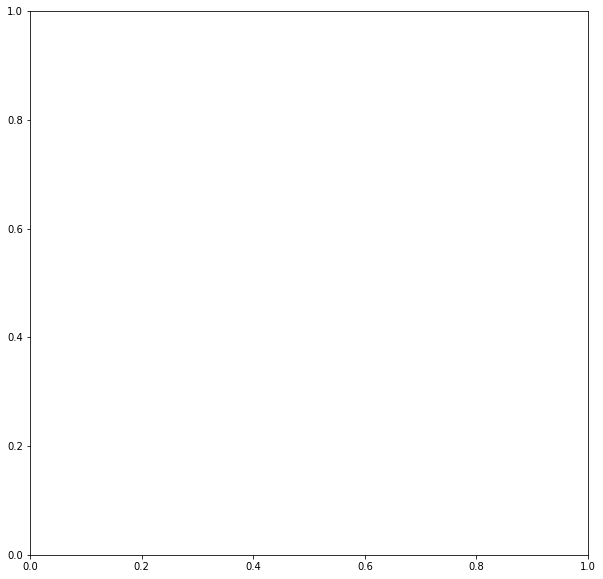

In [39]:
lw = 2
kernel_label = 'RBF'
model_color = 'm'
plt.figure(figsize=(10, 10))
plt.scatter(X_train, svr_rbf.predict(X_train), color=model_color, lw=lw,
                  label='{} model'.format(kernel_label))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)
fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [ ]:
X_train.shape

In [40]:
y_train.shape

(8571,)

In [805]:
# Using only 1st principal component
X=principaldf.values[:,0]
y_tr= dat.iloc[:,-2]
y=y_tr.values
print(X.shape)
print(y.shape)
print(y)

(10714,)
(10714,)
[49.13500977 51.14788025 73.224      48.77922526 87.8688     49.51834505
 49.67036052 49.12102503 48.5319223  48.47509668 46.97033863 45.49482239
 35.14752    48.9481065  49.61132791 47.88891212 51.00953596 47.20707817
 48.86866625 50.18043046 47.91033697 79.08192    77.12928    46.69892647
 41.00544    48.05022504 51.57640275 49.10439905 49.42409705 49.55984606
 47.82263849 47.26859746 49.5730028  49.76302553 51.57804643 47.08448865
 51.0641982  46.73637237 46.89209726 51.24121239 47.79626493 50.12177975
 46.74464648 46.12590892 48.94638319 82.01088    48.81607799 50.83172653
 47.72581138 45.94121377 44.23865726 53.6976     47.52949702 42.95808
 46.53669282 47.77265733 52.72128    50.84685913 50.69817569 49.43716927
 31.24224    47.61317142 46.87216233 49.6927204  33.19488    49.86699742
 46.73701355 46.22110305 47.53371028 46.61962979 46.59006606 50.46336591
 48.20580058 47.69401508 45.27726421 50.56016424 48.6633967  50.4101045
 50.07926467 48.24637031 96.65568    

In [806]:
# From the understanding that medical data is highly correlated devloping a model for the subset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=101)


In [807]:
from sklearn.svm import SVR
svr_rbf_p = SVR(kernel='rbf', C=1000, gamma=1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1, verbose=True)
X_train=X_train.reshape(-1, 1)
print(X_train.shape)

(8571, 1)


In [808]:
from sklearn.metrics import r2_score
pred=svr_poly.predict(X_test.reshape(-1,1))
print(r2_score(y_test,pred))

NotFittedError: This SVR instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [809]:
# Current model from here

In [886]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
clf = make_pipeline(SGDClassifier(max_iter=1000000,loss='perceptron',eta0=0.000001,tol=1e-4, learning_rate='constant', verbose=True, alpha=0.12))

In [919]:
# Using only 1st principal component and converting to classificaton problem
X=principaldf.values
y= dat.iloc[:,-1].values
print(X)
print(y)

[[ 1.62644279e+02  2.39266274e+01  2.78279412e+01 -7.24481077e+01
  -2.58812050e+01  6.61994205e+00]
 [-1.09109159e+00  6.10411858e+01 -5.74502399e+01 -2.13889870e+01
  -2.23331219e+01  1.38857835e+01]
 [ 1.37810349e+02 -2.05287541e+01  5.28429440e+01 -4.74467255e+01
   2.31960737e+01  2.70847595e+00]
 [ 1.31499586e+02 -5.02453444e+01 -2.99349662e+00 -9.82837016e+00
   9.45926229e+00 -1.06055148e+01]
 [ 1.10865048e+02 -3.66078104e+01 -4.20554125e+01  7.69978755e+01
   1.86537936e+01 -3.59020336e+00]
 [ 1.10594634e+02  3.05712632e+01  4.77366755e+01 -6.12842877e+01
   6.83327475e+00  1.99842353e+01]
 [-8.65133796e-01 -3.96881026e+01 -3.28118869e+01  1.92967031e+01
  -1.94573691e+01  2.35290007e+01]
 [-8.42113888e+01 -6.30836545e+01  2.49957108e+01 -4.22988943e+01
  -6.47596327e+00  6.65792239e+00]
 [ 3.13570561e+01 -3.97264056e+01 -2.51547845e-01  3.41755491e-01
  -1.85707707e+00 -5.04826045e-01]
 [-3.68319149e+01 -6.27173464e+01  1.07041934e+01  6.30096240e+01
   8.22786789e-01  7.8324

In [920]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=101)
X_train=X_train.reshape(-1, 1)
y_train=y_train.reshape(-1, 1)
print(X_train.shape)

(51426, 1)


In [921]:
clf.fit(X_train, y_train)

/home/samhar25/Conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Found input variables with inconsistent numbers of samples: [51426, 8571]

In [835]:
pred= clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred, y_test.reshape(-1,1))

NotFittedError: This SGDClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [791]:
accuracy

0.8716752216518898

In [792]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
class_names=['']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

disp = plot_confusion_matrix(clf, X_test, y_test.reshape(-1,1),display_labels=['Low','Mid','High'],cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title("Confusion Matrix")
print(title)
print(disp.confusion_matrix)

plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.44731327e+02 -2.04705813e+01 -4.54310544e+01 -9.43528050e+01
 -2.15785432e+01 -1.32591897e+02 -8.45041299e+01 -8.95175849e+01
 -4.17453681e+01 -1.22922030e+02 -4.67042306e-01  1.67399683e+02
 -1.42668862e+02  1.64370717e+02 -1.06560879e+02 -5.58953494e+01
 -1.23820415e+02  9.93601362e+00  9.28751742e+01 -2.24028578e+00
 -1.31926788e+00 -7.41241294e+01 -1.37367489e+02  5.37408720e+01
  4.65304909e+01 -1.16804872e+01  3.37437885e+01  3.24743072e+01
  3.74478824e+01 -1.49359488e+02  1.01409595e+02 -4.36711094e+01
  1.50531281e+02  7.53661684e+01 -1.40646788e+01  4.15452479e+01
  1.45494998e+02 -1.24895028e+02 -2.81090410e-01 -6.98207655e+01
  5.03203444e+01  3.92523326e+01  8.94501870e+01 -1.33722647e+02
 -9.27184302e+01  7.25426860e+01 -1.65917639e+02 -2.37212738e+01
  7.93065504e+01 -5.26843670e-01  1.31133085e+02  1.19467146e+02
 -8.88815082e+01  2.18267975e+01  1.66299516e+02  1.21084237e+02
  8.63236766e+01  1.41866261e+02  8.83133330e+01  1.09767976e+02
 -5.21889767e+01 -8.02696978e+00 -9.75381209e+01  4.42311772e+01
  2.56336688e+01 -1.31922616e+02  1.47191410e+02 -6.02365714e+01
 -1.02318055e+02 -1.65306779e+01  6.71971256e+01  4.84006288e+01
 -4.45205509e-01  1.05372009e+02  1.09990571e+02  3.13996560e+01
 -1.14279409e+02  1.33104508e+02  1.66362185e+02 -8.87998723e+00
 -1.49673791e+02 -1.05699680e+02 -6.69830332e+01 -3.57733777e+01
 -7.48048507e+01 -1.56831830e+02 -8.04297274e+01  8.81242888e+01
 -1.61282480e+02 -1.03418988e+02  2.60666401e+01 -9.13958166e-01
 -4.44470818e+01 -7.03733409e+00  3.47539305e+01 -3.08238952e+01
  1.71413541e+02 -4.33081476e+01  1.11155308e+02 -5.33915001e+01
  1.69102709e+01  6.88836656e+01 -1.07502441e+02 -1.03860921e+00
 -8.94039795e-01  1.01058084e+01  1.34558643e+02 -9.07527060e+01
 -6.32699924e+01 -2.35011394e+01 -1.23295399e+02 -8.70191227e+01
  1.64439617e+02  6.64948991e+01  1.17923452e+02 -6.96350132e+01
 -1.68083155e+02  6.77022766e+00  1.03260574e+02 -1.16911271e+02
  1.12098511e+02 -1.16898346e+02  4.05581802e+01 -1.51938836e+02
  2.00141089e+01 -8.99492121e+01  7.37462697e+01 -4.79784876e+01
  4.61213972e+00 -1.57388044e+02  1.59017784e+02  1.22362598e+02
  1.31243421e+01  1.48430014e+02  9.90901504e+01  3.52116201e+01
 -1.29878633e+00 -7.78515850e-01  4.29305743e+01 -1.22677690e+01
  1.68847462e+02  3.42332514e+01  1.32498447e+02 -1.42063782e+02
 -8.50787033e+01 -1.33593957e+02  6.32802338e+01  3.48718623e+01
 -1.30961672e+02  6.71917370e+01  7.13062460e+01 -2.45228189e+01
 -4.37329793e-01  1.48239621e+02  5.83657197e+01 -1.07709849e+00
  4.46885142e+01 -1.16934078e+02  1.33480847e+02  1.45190925e+02
 -8.42168696e+01 -3.85851670e+01  1.49085126e+02  3.50495808e+01
 -1.30443297e+01  1.36296257e+02  8.70979353e+01  7.12669615e+01
 -1.66032371e+02 -4.60907834e+01 -7.42672054e+01  1.29019814e+02
 -1.07983422e+02  8.68353142e+01 -2.77869630e+01 -4.09212082e-01
  6.30590104e+01  1.68469829e+02 -9.86308228e+01 -3.96023241e-01
 -1.63502984e+02  4.50524612e+01 -1.28053826e+02 -6.26954391e+01
 -1.27666015e+02  2.33766041e+01 -3.09083796e+01  1.12246052e+02
  9.10057989e+01  9.72287784e+01  6.00530598e+01 -1.62670451e+02
  6.34776725e+00  1.21523343e+02 -1.40733262e+02  4.54206941e+01
 -1.59200256e+02  9.94486492e+01 -5.79941883e+01 -1.23235605e+00
  1.81430839e+01 -8.66694182e+01  4.11594639e+01  3.95262540e+01
  1.25297568e+02  8.15725815e+01 -1.00834753e+02 -5.57783180e+00
  1.48050371e+02  8.19877737e+01  4.27999482e+01  7.08210415e+01
  4.55274786e+01 -1.21045549e+02  1.60348874e+02 -1.11293477e+02
  5.64557679e+01 -8.07975992e+01 -1.86442765e+01 -1.33048611e+02
  1.41580571e+02  1.07494343e+02 -1.10438151e+02  4.64405770e+01
 -6.47973675e+01 -1.23675668e+02 -6.98943448e+01  3.71172272e+01
 -1.67015179e+02  6.73723966e+01  1.65763106e+02 -2.94758460e+01
 -1.36331572e+00 -1.28780775e+02  1.57337246e+02  1.27690585e+02
 -8.39044299e+00  8.81502902e+01 -1.32102331e+02 -7.59016536e+00
 -3.84992054e+01 -1.35828044e+02  1.05914987e+00  4.95394335e+01
 -3.30938700e+01  1.29210005e+02  1.17870419e+02 -2.60625313e+00
  4.91225616e+01 -1.19722142e+01  7.16490401e+01 -1.59428837e+02
 -6.95591507e+01  1.23509413e+02  1.46112060e+02 -9.00893974e+01
  1.66788928e+02  8.99866604e+01  1.40150504e+02 -8.30919473e-01
  7.31939946e+01  1.46776576e+01  1.31302544e+02 -4.71375437e+01
 -2.20072204e+01 -5.92540063e+01 -1.38825483e+00 -9.81445316e-01
  1.82889793e+01  1.76208354e+01  2.71412642e+01  8.83749494e+01
 -1.36466382e+02  6.98748893e+01  1.51510633e+02  1.31202716e+02
  1.39000651e+02 -4.95892747e+01 -7.90305483e+01 -2.57249919e-01
 -9.84221176e+01  3.40105224e+01 -8.09551917e+01 -1.42318694e+02
  1.55108392e+02  1.10475409e+02  9.75748734e+01  1.10703741e+02
  8.87977003e+01 -1.54513515e+01 -2.82842888e+01 -8.07844166e+01
  1.10896110e+02 -7.57095093e-01 -3.82898581e+01 -1.11455841e+02
  1.27143432e+00 -3.80329012e+00 -9.26702808e+01  1.44848152e+02
  1.31881227e+02  3.46676980e+01 -1.48727003e+02 -5.63344081e-01
 -9.14962145e+01 -7.24267479e+01 -2.27534276e+01 -9.89111447e+01
  8.34936096e+01  1.62431475e+02 -1.02794693e+02 -2.67273785e+01
  1.02321813e+02 -8.10374835e-01  1.53320469e+02 -2.52032289e+01
 -1.63501445e+01 -9.56127085e+01 -3.35213066e+01  3.78800235e+01
 -9.64412483e+01 -4.55074222e+01 -2.55502837e+01 -2.71300071e+00
 -1.63002681e+01  5.80961284e+01  1.42979447e+02  1.26202030e+02
  5.00403354e+01  1.89736554e+01  2.79678987e+01  9.13818449e+01
 -1.90564289e+01  1.58004153e+02 -1.42412774e+02  1.24306743e+02
 -4.64037172e+01  7.73334401e+01 -8.37123803e+01 -5.89603628e+01
 -5.46698806e+00 -1.46556897e+02 -8.66577171e+01  1.11045923e+02
  3.89392911e+01 -1.27552847e+02  4.13676026e+01 -7.96531606e+01
  8.03920814e+00 -9.53170766e+01  9.94677916e+00  1.66460140e+01
  1.24261406e+01 -1.22782714e+02 -8.10375363e+01  1.17214329e+02
  1.56318806e+02  1.55085011e+02 -1.01185812e+02  9.13797525e+01
 -1.47669098e+01  1.66478384e+02  4.92456791e+01 -1.07440670e+02
  8.21869324e+01  9.95619567e+01  1.10241127e+02 -1.60932980e+02
  1.21736327e+02  3.37933894e+01 -5.27560706e+01 -4.26946499e+01
 -9.72101299e+00  1.40098929e+01 -9.66391457e+01 -4.61716490e+01
  1.46194922e+02 -1.61990514e+02  1.35373914e+01 -1.24537925e+02
  9.82997500e+01  1.27098066e+02 -1.32731290e+02 -1.48580078e+02
 -4.69905105e+01  3.83199531e+01 -1.16938609e+02 -4.23712859e+01
 -5.18329424e+01 -1.67830690e+02 -3.46480238e+01  6.42184381e-01
  1.53207370e+02 -1.31903042e+02 -1.10625563e+02  1.30389607e+02
 -1.28499587e+02  1.41479235e+01 -6.73277384e+01 -1.35577477e+02
  1.04575279e+02 -1.45754067e+02 -4.00097743e+01 -4.03570885e+01
 -6.29472427e+01 -2.91524462e+01  3.78924724e+01  9.79931034e+01
 -1.68941789e+02 -1.55442840e+02  7.28238842e+01 -1.12617619e+02
  5.53253931e+01 -1.02922386e+02 -3.46019891e+00 -2.91716138e+00
 -8.09498390e-01  1.66187811e+02 -4.38202021e+01  1.63636087e+02
 -4.93355482e+01 -1.25375746e+02 -1.26159892e+02 -1.62902337e+02
  1.13774638e+02 -1.20007301e+00 -3.39016697e+01 -6.49363440e+01
  3.21499717e+01  7.49531832e+01 -5.74673776e-01  5.62191516e+01
  8.60692860e+01  7.41686895e+01  1.01122840e+02 -1.31422970e+02
  2.69970068e+01  1.06698409e+02 -8.81710848e+01  8.29027005e+01
  1.04228093e+02  2.73936412e+01  1.13537287e+02  1.00067282e+02
  6.10232006e+01  1.51184049e+02  9.65926503e+01 -5.70333674e+01
 -1.54183961e+02  1.46113833e+02 -5.05880194e+01 -4.70664480e+01
 -1.83945778e+00  9.67115264e+01  1.02812840e+02  7.99595619e+01
 -8.57745285e-01 -1.00868857e+00 -1.58078128e+02  3.92688291e+01
 -5.64861978e+01  5.02466033e+01  5.72195927e+01  3.77657192e+01
 -2.04709645e+01 -1.47175666e+02  6.24542831e+01  6.05292662e+01
  1.42063508e+02 -1.07566910e+02 -3.06117218e+01 -1.00866604e+02
  1.12354385e+02  1.19299661e+01 -1.05460026e+02 -6.29158043e+01
 -1.38445535e+02  1.39578218e+02  3.21354314e+00  8.74188632e+01
 -5.31857341e-01  2.13322074e+01 -1.07177818e+00 -1.11877295e+01
 -2.89787018e+01 -1.59595777e+00  5.17637186e+01 -1.52242256e+00
  3.37697036e+01 -1.02325440e+02  1.14851208e+02  1.26477624e+02
 -6.66229955e-01 -1.29614393e+02 -3.57807580e-01  2.20830379e+01
  9.34541978e+01  1.84107963e+01  4.73119934e+01 -1.62972818e+02
 -5.56595778e+01 -1.19868125e+02 -6.16794862e+01  3.08911476e+00
 -1.66031247e+02 -1.38863460e+02  1.17408833e+02 -1.08864037e+02
  6.68045738e+01  1.37424740e+02 -5.41012395e+01  7.95850644e+00
 -1.13872665e+02 -1.65029318e+02  2.09973522e+01 -3.04313171e+01
  5.99268880e+00 -1.13722344e+02  1.60678507e+02 -1.02553451e+02
 -1.33166412e+02 -4.46290766e+01 -1.03590149e+00  7.12521514e+01
 -3.96043190e+01  1.24217797e+02 -1.49889426e+01  9.89658243e+01
  8.70985947e+01  1.23363203e+02 -5.97282477e+01 -3.08804829e-01
  1.21332920e+02 -3.68309510e+01 -7.15012074e-01  2.88306582e+01
  9.44801652e+01 -9.48213404e+01 -1.60270695e-01  8.81885913e+01
  4.17901934e+01  9.33218627e+00  4.35440299e+01  1.17654759e+02
  6.87505188e+01 -1.12837600e+02 -1.98615824e+01 -6.65123030e+01
 -4.66010684e+01  8.52856746e+01 -9.46467544e+01  1.71082355e+01
  6.47006701e+00  1.52988767e+02  9.57274612e+01 -1.21235984e+01
 -7.25344223e+01  1.48773521e+02  2.01216723e+01 -3.92752760e+01
 -7.84875526e+01  1.26029963e+02 -1.13766564e+02 -1.26022593e-01
  9.81490229e+01  1.63920336e+02 -1.14532225e+02  1.46286880e+02
 -1.63962221e+02 -8.49712934e+01  1.07708679e+02  5.67313582e+01
  7.41833863e+01 -1.21035955e+02 -1.46428526e+02  1.17107676e+02
 -5.29857520e+01  1.42628352e+02 -6.86798682e-01 -1.64897218e+02
  2.82084179e+01 -3.18259967e-01  5.79914263e+01 -8.09918210e+01
 -5.34637116e+01  8.57143831e+01  1.67166236e+02 -1.14974428e+02
  9.48125040e+01 -9.31580972e+01  1.60166137e+02  9.85001000e+01
  6.46721050e+01 -1.29847428e+02  1.05176700e+02  5.83238544e+01
 -6.55165296e-01  1.13241769e+02  1.53193262e+02  1.45951074e+02
  1.36019135e+02 -5.35792118e+01 -2.42292040e+01 -1.57916424e+02
 -1.02015657e+02  1.01112642e+02  1.54633285e+02 -9.47491837e+01
 -4.91261884e+01 -3.43191017e+01 -1.10929690e+00 -9.96502638e+01
 -5.35127813e+01  4.68850829e+01 -1.98658432e+01 -8.15022442e+01
 -1.08439433e+02 -8.16434661e+01 -7.65680427e+01  1.45760556e+02
 -9.13799489e-01 -1.56587209e+02  2.01022146e+01 -1.58597056e+02
  1.83273429e+01 -2.99213159e+01 -5.15633195e-01  1.48166755e+02
 -9.50240578e+01  1.40822781e+02 -1.20975738e+01 -6.19716569e-01
 -1.10513575e+02  1.28054220e+02 -8.41462846e+01 -5.12287865e-01
 -1.21978439e+02  4.93257244e+01  7.07273776e+01  5.80551820e+01
 -4.10653522e-01 -8.10817691e+01 -1.33139601e+02  1.53773861e+01
 -1.20667428e+02 -9.37601512e-01  1.65890028e+02 -6.91015705e+00
  9.35247238e+00  4.95988812e+01 -1.31206348e+02  1.65891376e+02
 -4.72141384e+01  1.29297395e+02  1.16255532e+02 -1.36617019e+02
 -3.30979008e+01 -1.23087875e+02  8.78677784e+01  1.43341754e+02
  1.13934840e+02 -6.89402662e-01 -1.18574923e+02 -1.62982500e+02
 -1.27455859e+02  1.73298377e+01 -5.76463532e+01 -1.02121519e+00
  1.65520527e+02 -5.66790105e+01  1.20637966e+02  6.15058187e+01
 -6.70230171e+01 -9.10287199e-01 -9.93856478e+01 -2.10748986e+01
  7.33909875e+00 -7.95854714e-01 -1.39416862e+02 -1.34325951e+02
 -6.23075990e-01 -8.23251127e+00 -9.40376208e+01  2.25612592e+01
  5.96526323e+01 -3.21351604e+01 -9.87400664e+00 -1.59569225e+02
  1.51262404e+02 -1.54902210e+02 -1.41442800e+02  4.33450845e+01
 -1.70130192e+01 -1.38346901e+02  1.72258093e+01 -2.95016953e+01
 -3.11472274e+01  1.70892349e+02 -1.93312125e+01  1.09155360e+02
 -5.52537498e-01 -1.00562993e+02  1.04571840e+01 -1.60014396e+02
 -7.27489575e+01 -1.37577542e+02  5.09184970e+00 -7.77061965e+00
 -1.16374925e+02  1.21965881e+02 -6.15421280e+01 -4.00864465e+00
 -6.96517323e+01 -1.53894433e+02  9.31667451e+01  6.01709213e+00
 -7.76559822e+00  1.02923133e+02 -9.64883296e+00 -5.90470200e+01
  8.69260396e+01  6.37180163e+01  1.12373946e+02  1.57779760e+02
 -9.81729294e+01 -9.02684550e+01 -9.57776619e+01  1.36779747e+02
 -9.74045239e+01 -1.62519989e+02 -9.51957794e+01 -1.44045860e+01
 -4.27778059e+01  5.41990628e+01  2.86509660e+01 -7.25757685e+01
 -4.63125143e+01 -1.48277335e+02 -1.50439793e+02 -9.42997823e+01
 -9.68765915e+00  9.22997145e+01  1.02877074e+02  1.26889359e+02
 -9.00023605e+01 -1.53252738e+02 -6.89040855e+01 -8.94148797e+01
  7.17720278e+01  9.89654350e+01  5.04179296e+01  1.15229249e+02
 -1.24034481e+02 -6.00489653e+01 -1.29615121e+02  2.04740520e+01
  1.46738277e+02 -1.08698191e+02  1.70300245e+01  1.37299930e+02
 -1.33107373e+02 -1.21018501e+02  7.80849704e+01  1.45029102e+02
  1.38633120e+02 -8.54384536e+01  2.58504148e+01 -1.05393793e+02
  2.22020949e+01 -8.04666899e-01  4.00530200e+01 -5.77530113e+01
 -1.51705000e+02 -8.14448676e-01 -1.64394991e+02 -1.07326242e+02
  1.41652582e+02 -9.55210928e+01 -9.25889067e+01  1.38856583e+02
  1.13316672e+02 -1.51321005e+02 -1.78512441e+01 -1.23144376e+02
 -7.31086594e+00  9.31717389e+01 -1.98562434e+01  1.61296895e+02
  1.29377220e+02  1.18180214e+02 -6.72261619e+01  2.76613777e+01
 -1.23301528e+00  1.27407403e+01  1.45739667e+02  3.52522310e+01
 -6.95788689e+01 -4.28855267e+01  1.55356901e+02 -7.01952305e+01
  5.17381356e+00  7.43955356e+01 -1.56427058e+02 -1.03064547e+02
  7.52913174e+01  1.39104795e+02  1.63008505e+02 -7.88802934e+01
  1.62753338e+02 -1.55851736e+02 -1.42234172e+02 -1.01787014e+02
  6.46625156e+01 -1.13294895e+00 -7.90921347e+01 -9.55728702e-01
 -9.11068043e+01 -6.65073589e+01 -1.26253522e+02 -6.34659485e+01
  1.56838942e+02 -1.92416123e+01 -1.67592100e+02 -8.30236987e+01
 -6.03790845e+01 -1.57825128e+02 -7.22789341e+01 -1.10200638e+02
 -1.47531442e+01 -2.09569150e+01  1.61730301e+02  1.33396389e+02
 -7.55007201e+01  8.13807706e+01 -1.49093156e+02 -3.91064632e+01
 -1.21449743e+02 -1.06956712e+00  4.41664786e+01 -8.16796592e+01
 -6.34681001e+01  9.83170123e+01 -9.05092063e+01 -8.36756252e+01
  1.68059896e+02 -1.36592556e+02 -2.06613194e+01  1.47506696e+02
 -9.91911725e+01 -9.44184727e+01  1.47063063e+02 -1.39104430e+02
  1.66572053e+02 -1.23937796e+00 -1.37283057e+02  5.21898474e+01
 -5.42159543e+01  1.49540949e+02 -1.26357609e+01 -1.56535882e+01
  1.55029191e+02  1.10416125e+02 -1.49109578e+02  1.55521571e+02
  9.91492354e+01  1.70879879e+02 -1.56302187e+02  4.12832091e+01
 -1.24192943e+00  8.54175255e+01 -9.18890347e-01  5.91028622e+01
  2.73663945e+01 -2.24647866e+01 -1.66992450e+02  4.81238483e+01
  1.35942383e+02 -3.51019283e+01 -3.19029433e+01 -3.17273175e+01
 -2.85545020e+01  8.29816307e+01 -7.19127206e+01 -8.39014177e-01
 -7.59534454e-01  7.76981971e+01 -4.24904266e+01  6.27174141e+01
 -8.04726775e+01  1.04079160e+02  1.61041375e+02 -8.56300127e+01
 -1.65816816e+02  1.25031946e+02  1.47439940e+02 -4.28281663e+01
 -9.24827156e+01 -1.69095809e+02 -9.33682686e+01 -4.69543086e+01
 -1.62881384e+02  7.98300228e+01  3.08549445e+01 -6.15788049e-01
  4.12590759e+01  1.28660420e+01  1.03937404e+02 -1.40714522e+02
 -1.00462936e+02  1.13072512e+01  1.32761163e+02 -7.04315061e+01
  8.24455189e+01 -2.70783933e-01 -1.95612774e+01 -1.68862594e+02
 -7.40179981e+01  1.43392222e+02 -1.19103213e+02  3.52991013e+01
 -1.64376661e+02 -1.57881626e+02 -2.32728505e+00 -1.52749877e+02
  2.70760215e+01  1.38530032e+02 -9.22186684e+01  2.41385885e+01
  4.17225035e+01  1.89833712e+01 -4.69915685e+01 -1.20254520e+02
 -8.27307233e+01 -9.92959139e+01 -1.16223973e+02  1.50815790e+02
 -7.01774172e+01  3.40769963e+01 -1.08954589e+02 -8.06929567e+01
  1.80018007e+01 -6.77176823e-01 -1.26417881e+02 -2.06007389e+01
  4.38008065e+01 -1.25478076e+02  1.47340712e+02  8.33157873e+01
 -1.19917294e+02 -2.95010454e-01 -5.25627156e+01 -7.51460149e-01
  8.40197791e+01 -1.57390268e+02  2.17971340e+01 -3.79374798e+01
 -1.52576026e+02 -6.29783544e+00 -4.10514573e+01  3.59698717e+01
 -1.29153043e+02  1.62869121e+02 -4.15895656e+01  4.65419826e+01
 -4.39025820e+01  3.99098047e+01 -1.51397282e+02  9.48173202e+00
 -1.05701189e+01  6.38524172e+01  5.64548618e+01  1.13524902e+02
 -1.68149527e+02 -9.78687871e+01  1.43410036e+02 -1.59971219e+02
  1.48576712e+02 -2.44457241e+01  1.39133927e+01 -8.85950263e+01
 -3.42683048e+01  1.54301818e+02 -1.43020462e+02  1.63202169e+02
  5.18466806e+01 -1.55999187e+02  8.99301664e+01  4.89477736e+01
 -1.16179555e+02 -9.44157819e+01 -9.48834161e+01  1.07109458e+02
 -4.19537637e+01 -5.42690203e+01  1.29299314e+02  4.03370721e+01
 -1.75640679e-01  1.68122033e+02 -7.59474644e+00 -9.85215182e+01
 -1.15752379e+00 -8.39283917e+01  1.05821835e+01  6.52650704e+01
  2.16722437e+01 -8.39637055e+01 -9.02422839e-01  7.17333511e+01
  1.81191542e+01 -1.08726097e+00 -9.61144326e+01 -5.45473064e+01
  1.28238456e+02  1.70975820e+02 -1.14493893e+02 -9.91451571e+01
 -1.32504130e+02  1.47188594e+02 -1.06222196e+02  1.33982631e+02
 -6.69948583e+01  2.63035142e+01 -9.32803675e+01 -1.19568953e+02
  1.01589529e+02 -4.86406420e+01  1.36176651e+02  1.38159627e+02
  1.62544168e+02 -1.67816351e+02  7.22206068e+01  1.45887788e+02
  1.22493909e+02 -1.61430441e+02  6.74590568e+01  3.61180885e+01
 -1.27488231e+02  5.84093227e+01  8.05237782e+01 -1.66728908e+02
  9.56423545e+01  9.73947967e+01 -1.22902989e+02  3.43476313e+01
 -6.83271575e+01 -3.27961966e+01 -4.68599379e+01 -1.33371178e+02
  9.39737630e+01  1.52951565e+02 -1.57171002e+02  1.20150475e+02
  1.45186890e+02  5.15337103e+01 -1.07016575e+02  1.46956262e+02
 -9.61973591e-01 -7.32614453e-01 -9.75933239e+01 -8.55886637e+01
 -4.58043496e+01  1.46960357e+02  4.23519411e+01 -5.80461479e+00
  7.07799369e+01 -1.11285656e+00  1.69500336e+02 -1.11597782e+02
 -1.21924192e+02  4.99683781e+01 -9.03415653e+01  5.92865575e+01
  1.05506093e+02 -1.25711877e+02  1.47141036e+02 -6.16177335e+01
 -6.25628838e-01 -2.47907441e+01  1.58823333e+02 -1.64504424e+02
 -2.25701159e-01 -4.78731995e+01 -5.58606734e+01 -3.52335928e+01
  7.92080135e+01 -6.94651671e+01  1.30550779e+02 -7.75003501e+01
 -1.35161716e+02  1.05186289e+02  1.56918441e+02  8.42772032e-01
 -1.20413718e+00  1.23966614e+02 -4.38521675e+01  3.08580733e+00
 -1.25543079e+00  1.65910595e+02  9.03681969e+01  1.26427178e+02
  8.20769638e+01  2.03770008e+00  7.70592918e+01 -1.40440855e+02
 -1.78646423e+01  1.23759723e+02 -1.44264996e+02  9.35019897e+01
 -1.37378266e+02 -1.36881628e+02 -3.81102898e+01  9.99684112e+01
  1.24576684e+02  8.65649293e+01  1.04224779e+02 -8.59583637e+01
 -7.38991243e+01 -5.48863278e+01  2.43156733e+01 -6.45711093e+01
 -1.54488316e+02  1.19472242e+02 -9.02727746e+01 -2.23400440e+01
 -1.50071517e+02  1.02842455e+02  3.32992781e-01 -1.09288865e+02
 -1.41795687e+02 -1.09048647e+01 -2.84280514e-01  6.60007751e+01
  3.12949702e+01 -1.12683720e+02 -1.54072782e+02  1.36065444e+01
  1.69354416e+02 -1.63105376e+02 -8.52637833e-01 -1.31341244e+02
  7.94264609e+01 -1.20787190e+02 -1.07917276e+01  7.42045686e+01
  4.69366751e+01 -7.25122759e+01  1.25239469e+02 -1.60606282e+02
 -1.02764681e+02  1.43121741e+02 -1.05367061e+02 -1.81434591e+01
 -1.04646348e+02 -8.92125661e+00  5.43120419e+01  8.62837034e+01
 -5.58573851e+01  1.62964589e+02  7.26962213e+01  1.67217108e+02
 -1.60663023e+02 -8.59491233e+01 -4.99541644e+01 -1.43501222e+02
  7.14228945e+01  8.53776008e+01 -3.19027991e+01  1.47900949e+01
 -3.33359637e+01 -1.03569239e+02 -1.14489352e+02 -1.11524801e+02
 -1.38756643e+02 -7.09136188e+01  5.91309085e+01 -4.27479377e+00
 -4.88686039e+01 -1.47710618e+02  1.25569800e+02 -1.07935878e+02
 -2.24180512e+01  1.13421184e+02  1.36462283e+02 -9.93483230e+01
 -1.66660028e+02  1.04463631e+02  7.10666210e+01 -4.41175993e-01
 -4.23430946e+01  2.66385436e+01 -4.77730902e+01 -1.96963894e+01
 -1.64036457e+02  5.50780758e+01  1.57729446e+02  1.24239488e+02
  1.54697949e+02  1.36245852e+02  1.14711305e+02  7.06798418e+00
 -4.96966446e+00 -8.07245780e-01 -7.56668505e+01 -3.88414265e+01
 -6.02671650e+01 -1.04853779e+02 -1.62302485e+02  1.68057273e+02
 -2.22570482e+01  6.73113073e+01 -6.29090315e+00 -5.12774656e-01
  6.82405000e+01  1.42457807e+02 -6.83480972e+01  1.08640912e+02
  1.81598653e+01  6.94455501e+01 -3.96556668e+01 -8.98029925e-01
  4.66049455e+01  3.56480587e+01  1.05883616e+01 -1.20784321e+02
 -5.88514379e+01  1.46992814e+02 -1.65012111e+02 -8.19274045e+01
  1.01577490e+02  1.08030883e+02 -4.97034444e+01  1.61335672e+02
  1.17204244e+02 -3.97156105e+01 -9.09221805e+01 -1.13918764e+01
  1.03683736e+02  7.90211076e+01 -5.92326640e+01 -4.50442535e+01
  1.68725293e+02  1.17976948e+02  2.70546591e+01  4.98842045e+01
  2.32791016e+01  6.76073883e+01 -4.79220527e-01  6.54877214e+01
 -1.00187200e+02 -1.27955520e+01 -8.55907364e+01  1.25074269e+02
 -1.49561261e+02  1.15270189e+02 -1.26516616e+02  1.26185762e+02
 -1.41328690e+02 -1.14259481e+01 -8.30351680e+01 -1.22040478e+00
 -1.09842878e+02 -5.94533537e+01 -1.14302033e+00  4.64047075e+00
 -1.69000705e+02  1.42247061e+02 -3.81498439e+00  1.51157572e+02
 -5.88935596e+01 -6.65972568e+01  1.33320925e+02  1.06353299e+01
 -3.71431436e-01  9.74907561e+01  1.13240361e+02  1.97666360e+01
  4.55173638e+01  1.69472798e+02  1.33566609e+02  6.29207211e+01
 -1.23877913e+00  1.22025495e+02  1.54752647e+02 -1.17127970e+02
  1.48376706e+02  9.14651838e+01  1.42133307e+02  2.19019673e+01
  7.37289969e+01  5.04346951e+01  1.05182380e+02  5.63247039e+01
 -4.80794676e+01  1.07346384e+02 -1.64136896e+02  1.04001433e+02
 -8.39659100e-01 -1.47351562e+02  7.22681010e+01  1.10820532e+02
 -9.29603808e-01  1.18615716e+02 -7.88178244e-01  2.00300409e+01
  9.01128903e+01 -3.84100984e-01 -1.51466606e+02 -1.04572817e+02
  1.28177016e+02  1.32095103e+02  1.76530180e+01  1.03715768e+02
  1.26559683e+02 -1.19997916e+02 -1.32557729e+02 -8.16918723e+01
 -1.44658832e+02  1.61174439e+01 -3.91430017e+01  1.54106005e+02
 -1.59682269e+02  3.92126559e+01 -8.88520084e-01 -1.31664485e+02
  3.56533903e+01 -7.30673969e+01  2.13557066e+01 -1.13635469e+01
 -8.75721447e-01  6.23553317e+01 -8.12101308e+01  1.50759992e+01
 -5.63361018e+01  1.12745234e+02 -1.76195119e-01  1.93169488e+01
 -8.49139442e+01 -5.91834122e+01 -1.41333542e+02  1.27365437e+02
 -1.68797505e+02  7.00607076e+01  1.12882573e+02 -1.09809668e+02
 -1.45683922e+02 -1.50675577e+02  1.42470817e+02  1.11537804e+02
 -1.53308584e+02 -2.17428883e+01  8.56375652e+01 -1.31713167e+02
 -7.97498479e+01  7.46669124e+01  3.49755651e+01 -1.08654061e+00
 -1.25915434e+02  7.81397646e+01 -3.32157146e+01  9.85475319e+01
 -1.40624915e+02 -1.10771143e+02  3.69717042e+01 -9.65638052e+01
 -1.27420042e+02  1.65185136e+02 -7.53339697e+01  9.76448467e+00
  9.25453410e+00 -8.89538762e+01  1.06852936e+01  6.96130101e+01
  3.39179778e+01 -5.06270503e+01  3.72637617e+01 -1.35379701e+02
 -1.29071332e+02 -8.51311381e+01 -9.51405049e-01  8.34313572e+01
 -7.77091360e+01 -1.21794148e+02 -1.02933254e+02  1.54022664e+01
 -7.22792534e+01 -8.78463724e+01  8.59507751e+01  3.68927592e+00
  9.63095120e+01 -1.19013129e+02  5.26805258e+01 -1.25675585e+00
  1.35386166e+02  2.31994440e+01 -4.97517095e+01 -9.66624599e-01
 -5.01940096e+01 -1.28675949e+02 -6.35812186e+01  4.85996093e+01
  6.54756755e+01  6.77780551e+00  1.21386985e+02  9.06670839e+01
  9.60379244e+01  5.74069303e+01 -3.44967091e+01 -6.88126261e-01
 -1.39776327e+02 -8.93110340e+00 -1.13767029e+02  1.49421950e+02
  5.60808821e+01 -8.38852212e+01 -1.07673730e+02 -8.90623439e+01
 -2.54949530e+01  1.29024506e+02 -1.42553093e+02  1.22493152e+02
  9.53684625e+01 -5.82111176e+00  1.35730342e+02  1.57967822e+02
  8.41101229e+01  8.06738561e+01  8.62769307e+01 -6.36694482e+00
 -4.55519814e+01  3.89862438e+01 -9.47515016e+01  1.46280280e+02
 -1.31492150e+02  1.62207697e+02  1.42098298e+02 -6.36203876e+01
 -3.71355294e+01  1.37719954e+02  3.11775127e+01  1.48397894e+02
 -8.28319302e+01 -7.47581289e+01  1.22300581e+02  1.66445263e+02
 -9.02637424e+01 -8.84999102e+01 -1.53927527e+02 -9.51198500e+01
  1.24280388e+02  1.08268908e+02 -1.23103048e+00 -1.66263260e+01
 -1.66645983e+02 -1.58195339e+02  4.51174256e+01  2.93861572e+01
 -4.94855329e+01 -4.72134270e-01  1.95315512e+01 -5.24654645e+01
 -1.26702377e+02 -2.46723192e+01  5.83546256e+01  1.54457279e+02
 -4.23442456e+01  1.32905064e+02  1.40119690e+02 -1.54863823e+02
  6.64662160e+01  1.66722390e+02  5.23158004e+01  1.52537355e+01
 -8.29006269e+01 -1.20983644e+02 -1.52351538e+02  1.95210184e+01
 -5.53969602e-01  1.45325653e+02 -6.18273129e+01 -3.48504878e+01
 -7.26364105e+01  1.31876928e+02 -6.84790953e+01 -1.51742981e+02
  5.34706166e+01  4.25108529e+01  1.55230564e+02 -1.66792399e+02
  1.56376214e+02  4.83330077e+01 -4.91312631e+01 -1.23453472e+02
 -1.30505184e+02 -9.95912701e+01 -2.36052951e+01 -5.95478031e+01
  1.36588281e+02  1.98852130e+01 -6.50927761e+01 -5.59303953e-01
  1.28995710e+02  4.26188783e+01  1.64060503e+02 -4.93281825e+01
  1.66409147e+02  1.08524007e+02 -1.21146410e+02  1.48353744e+02
 -5.75796099e+01 -5.65184146e+01  1.02711245e+02  1.30196206e+02
 -7.39406822e+01 -4.83090826e+01  4.50578732e+01  1.19395099e+01
 -2.35396913e+01  1.24215102e+02  1.17410248e+01  9.73928796e+01
  3.88021213e+01  1.69332308e+02  3.40495824e+01 -1.52950975e+02
 -5.11477388e+01  6.92142166e+01 -3.88720814e+01 -1.15839719e+02
 -7.11926638e+01  1.33913136e+02  9.75028614e+01  1.42271863e+02
  1.50826421e+02 -1.79370789e+01 -1.50109153e+02 -2.61054093e+01
 -6.10467100e+01 -7.29074601e-01 -8.21758652e+01 -1.35727886e+02
 -5.39038615e+01  2.01903163e+01 -1.45914175e+02 -1.00157332e+02
  1.73566734e-01  1.08488979e+02  1.58373437e+02  8.15919236e+00
 -1.14578319e+02  1.60742185e+02  1.25486927e+02  1.35968182e+02
  9.69998642e+01 -1.20135357e+02  1.67434082e+02 -1.50610290e+00
 -3.23406577e-01  2.90941886e+01 -9.09727571e+01  3.97575346e+01
 -1.37234714e+02  1.16465785e+02  1.66739485e+02 -1.56576520e+02
  6.49599308e+01 -1.65661572e+02  1.00689565e+02  1.43849286e+02
 -1.66575874e+02 -1.62514142e+01 -1.31786446e+02 -1.54991956e+02
 -5.87674522e+01  4.90224876e+01 -7.10259931e+01 -6.26979384e+01
 -9.94901944e+01  9.80360905e+01  1.38055032e+02 -2.67008739e+01
 -5.88203919e+01  1.52472352e+02 -4.37607266e+01 -1.40729495e+02
 -1.19776321e+01  1.41357615e+02  5.61481084e+01 -9.03382962e-01
 -8.01939944e+01  4.58207818e+01 -4.88106838e+00  8.81694796e+01
  1.62033583e+02 -1.24869996e+02 -1.25913811e+02  8.89156190e+01
 -9.81277537e+01 -7.43423469e+01  9.60380133e+01  5.91581940e+01
  1.48426738e+02  6.32913074e+01  1.34427804e+02  1.33622309e+02
 -1.18814826e+02 -4.16062898e+01 -4.44118679e-01 -5.47309827e+01
 -1.29652928e+02  5.87470086e+01  4.08272312e+01  8.10112666e+01
 -5.72044632e+00 -4.70660975e+01  6.95287304e+01 -1.52327704e+02
  8.15579626e+01 -4.15729438e+01 -8.00162719e+01 -1.26732857e+00
 -2.94460269e+01 -5.11468169e+01  9.87481442e+01 -5.45214234e-01
 -7.82882573e+00  1.02207503e+02 -1.10074029e+02  1.42839528e+02
  1.59932576e+02 -1.55901563e+02 -1.45407901e+02  5.64228091e+01
  8.27760139e+01 -1.63120895e-01  1.71397331e+02 -6.35171026e+01
  1.14418889e+01 -1.07806017e+02  9.61805690e+01  1.00341167e+02
  1.35434765e+02  2.16016570e+01 -1.67094746e+01 -7.96325556e+01
 -1.49021271e+02  2.33270421e+01 -3.78032570e+01 -3.01913703e+01
 -3.18910190e-01  7.53751235e+01 -1.43836739e+02  1.33349886e+02
  8.75744346e+01  1.61231875e+02 -1.12899306e+02 -1.50100061e+02
 -1.35916968e+02  2.31571826e+01 -9.94958824e+01 -1.86698291e+01
 -6.46244592e+01 -4.16520759e+01  1.47482969e+00  5.05153181e+01
 -1.19366005e+01  8.75364373e+01 -1.50568994e+02 -9.67347655e+01
 -1.48984187e+02 -4.21532495e-01 -1.22582950e+02 -1.61325454e+02
 -1.23383522e+02 -1.17234944e+00  7.86791554e+01 -5.37797265e+01
  1.38254700e+02  1.42501816e+02 -9.83041167e+01  1.01955476e+02
  1.39749629e+01  1.61954625e+02  1.12210594e+02 -3.09833193e+01
  1.41985700e+02 -5.19950450e+01 -7.43541824e+01  1.51207072e+02
  2.14661761e+00 -1.29352302e+00 -9.48037718e+01 -1.01805391e+02
  1.02454197e+02  4.02578525e+01 -1.40643017e+02  1.27407622e+02
 -1.50334253e+02  4.11246360e+01 -2.94023716e+01 -9.56736033e-01
 -1.03658295e+02 -1.33538349e+02 -1.41953224e+02 -8.19287850e+01
  8.52508694e+01 -1.02933853e+02  2.63207273e+01 -4.23181040e+01
 -1.36436051e+02 -1.67871425e+02  3.09714679e+00  5.44968170e+01
 -1.07659915e+02  1.72077421e+02 -1.16519562e+02  9.19747956e+01
  3.29172875e+01 -8.76777506e+01 -9.40751835e+01 -6.99671527e+01
 -1.27017188e+02 -1.05298313e+02 -5.37744404e+01  1.45725958e+02
 -1.68769282e+02 -1.93959479e+00 -1.25999110e+02  1.26450490e+02
 -5.08716397e+01 -7.80032467e+01 -1.68758032e+02 -3.35650525e+01
  1.53082203e+02 -4.57306165e+01 -9.15791825e+01 -4.54434174e+01
 -3.64720970e-01  6.43061880e+01  1.33848018e+02  1.59690174e+02
 -1.31838687e+02 -1.30656638e+02 -6.94551694e+00 -5.42304831e+01
 -5.38607507e+01  6.67512576e+01 -2.99219784e-02 -7.68760166e+01
 -6.67782750e+01 -4.73130945e+01  3.60365005e+01 -7.58468507e+01
 -5.42200875e-01  1.71897406e+01  1.67707495e+02  1.57990303e+02
  8.71296194e+01 -3.17397891e+01 -7.95086454e+00 -9.69372096e-01
  1.34579802e+02 -9.15459241e+01  1.47130554e+02 -7.33678642e+01
 -6.54312148e+01  1.36345947e+02 -1.06902542e+02 -9.69701122e+01
  1.52141827e+01 -3.56083681e-01  5.18044566e+01 -1.39938619e+02
  3.16155790e+01  2.36057478e+01 -1.68624515e+02 -9.79084499e-01
  3.42299564e+01 -4.31051198e+01 -1.20471257e+02  3.60159913e+01
 -9.99788936e+01  9.26233746e+01 -9.45832016e+01 -1.38946977e+02
 -9.83396485e+01  9.86568856e+01 -6.33373464e-01 -7.91536212e+01
  1.17032241e+01  1.26639254e+02 -1.50722227e+02  7.60162892e+01
  1.26857530e+02 -1.04170158e+02  1.17542084e+02 -3.76848810e+01
 -1.48316352e+02 -4.50611117e-01  1.09211775e+02  2.60456343e+01
  9.41810188e+01  1.50160327e+02 -1.47500095e+02  4.82316639e+01
  1.14966329e+02  7.61027499e+01 -1.58147196e+00  1.38430629e+02
  1.50160691e+02 -1.58044873e+02  1.42091843e+02  1.12124410e+02
 -2.00566865e+00 -6.77991338e+01 -1.36570541e+02 -2.28632125e+01
 -1.47861253e+02 -8.94602218e+01 -6.78455944e+01 -1.44120115e+02
 -6.51472449e+01 -1.36693521e+02  5.88342621e+01 -9.89586219e+01
  1.03960659e+02  7.79803744e+01  5.37818563e+01  1.41499498e+02
  1.19166112e+02 -6.17654697e+01 -4.18831595e+01  1.63848192e+02
  1.11967035e-01 -1.89303721e+00  7.03938815e+01  5.00435633e+00
  3.46987082e-01  1.04363412e+02 -1.15418535e+01 -2.46240535e+01
  8.00869896e+01  9.88597522e+01  1.36693912e+01 -1.37857351e+02
  9.41920714e+01 -1.01573296e+00  1.18149945e+02 -5.48302250e+01
  9.44963486e+01 -1.52732196e+02  1.51383229e+02  7.31649471e+01
  5.57056060e+01  1.56072143e+02 -8.36314877e+01  8.12744152e+00
  1.15866577e+02 -1.02595689e+02  1.23419270e+02  8.01780031e+01
 -1.35775858e+02 -1.44726931e+01  1.54025578e+02 -1.03579851e+00
  1.54281219e+02 -9.65231250e+01 -4.16729375e+01 -7.05843060e+01
  4.43858980e+01 -5.48572598e+01 -6.88308464e+01  1.36145719e+02
  8.01972094e+01  5.34381212e+01 -1.15247274e+02  9.44463499e+01
 -3.01116622e+01  5.03747528e+01  1.43591366e+02  2.71195750e+01
  1.79522796e+01  3.67053885e+01 -2.21429495e+01 -8.98576501e+01
  9.32526404e+01  9.40461030e+01 -1.43631147e+00 -3.42915444e+01
 -5.57433671e+00 -1.56130578e+02 -1.21524978e+02 -1.26957782e+02
 -6.85222822e+01 -1.37389415e+02 -3.07157165e+01 -3.58485927e+01
  1.77342755e+01  9.61029143e+01  1.37306275e+02  9.42176258e+01
  3.33890528e+00 -6.98744413e-01 -1.33477025e+02  1.38281499e+02
  1.05612760e+02 -3.36969289e+01 -9.15056054e+01  1.63119407e+02
  9.01858618e+01  1.37232741e+02 -7.36324709e+01  1.26232965e+02
 -1.07748340e+02 -1.46548520e+02  1.10864464e+02 -1.47657281e+02
 -1.26741070e+02  5.31099809e+01  1.35827173e+01 -9.45596852e+01
  1.29394787e+02  1.16324338e+02 -1.36644926e+02  4.82623184e+01
  6.27729102e+00 -7.07017899e-01 -1.35647765e+02 -1.54473457e+01
  2.44419693e+01 -1.49777230e+02  5.57488860e+01 -1.47197337e+02
 -1.56568879e+02  4.96857770e+01  1.28184688e+02  1.23782986e+02
 -1.38260589e+02 -1.08803298e+02  1.36098412e+02  8.51655047e+01
  1.03508603e+02 -1.62300284e+02  1.02133657e+02  1.66198897e+02
  1.18555750e+02  2.76032508e+01 -1.03901480e+02 -1.67631366e+02
 -9.74297575e-01  1.27760362e+02  3.75155922e+01  8.20852989e+01
  1.31321042e+02  2.77481309e+01 -1.32346462e+02  8.44478884e+01
  1.21216942e+02  3.11055051e+01 -1.48793313e+02  8.40302612e+01
 -5.25798605e+01 -4.67011626e+01  3.08419871e+01 -7.27104757e-01
 -1.47703104e+00  1.40394866e+01 -1.16179255e+01  6.58493093e+01
  3.13570561e+01 -6.75890150e+01 -8.76697682e+01  7.70025819e+01
 -1.37666888e+02  9.99754254e+01  6.61153810e+01 -5.98661617e+01
 -5.94501683e+01 -5.80455383e+01  6.42041039e+00 -8.49836460e+01
 -8.86195179e+01  1.66680145e+02 -4.24592537e+01 -1.13854095e+00
 -1.50622053e+02 -6.39528339e+01  6.16247733e+01 -1.16322907e+01
 -5.60015313e+01  7.57890313e+00 -1.34214657e+02 -9.52278109e+00
 -1.23116887e+02 -1.43159183e+02  1.96037703e+01  5.73282669e+01
  2.49679740e+01 -1.29146945e+02  1.31298145e+02 -1.38767981e+02
 -1.37048801e+02 -1.16385475e+02  1.00528031e+00 -1.46089101e+02
 -8.76832350e+01 -6.40429020e+00  1.77156816e+01 -9.08091481e-01
  7.36725060e+01 -6.92610330e+00 -2.17391382e+01 -1.36751855e+02
  7.72411441e+00 -3.52558044e+00  1.35647195e+01  4.98445382e+01
  7.15319587e+01 -1.15118085e+00 -9.50184022e+01  1.00850276e+02
  1.68323124e+02  1.32015087e+02 -3.29967900e+01 -9.17346645e+01
  2.85378847e+01  7.32660667e+01  7.15442023e+01 -1.49630309e+02
  6.82084729e+01 -1.43318356e+02  1.18897402e+02  5.55135565e+01
  3.34288009e+01 -1.58034270e+02  1.44175702e+02 -5.36506962e+01
 -1.60758945e+01  1.97994901e+01 -1.42676938e+02 -1.26872931e+02
 -5.72080471e+01  1.53982996e+02 -1.34171451e+02  1.38060427e+02
  2.89146579e+00 -3.49852002e+01 -3.62972395e+01  1.59625303e+02
  8.96879053e+01  6.92885696e+01 -1.13062732e+02  4.70578468e+01
  1.02563717e+02  1.33304011e+02 -6.70891968e+01  1.53818100e+02
  1.15119225e+02 -1.37071928e+02 -9.80106328e+01  1.30297525e+02
 -1.00145114e+02 -1.69424710e+01  1.20210135e+02 -1.06460416e+00
  1.30172730e+02 -1.57484443e+02  1.36886354e+02  1.23059035e+02
  8.07452331e+00 -8.83760311e+01 -1.19028239e+02 -2.70909906e+01
 -6.05066120e+01 -1.23473112e+02 -7.92487022e+01 -8.50692419e+01
 -1.64070272e+02 -6.92231461e-01 -9.84054928e-01  4.10877664e+01
 -7.18406328e+01 -1.02879629e+02 -5.10277381e+01 -5.99253941e+01
 -1.11036870e+02  1.11146383e+02  1.11729814e+02 -1.62838080e+01
  3.42611986e+00 -7.16846315e+01 -1.15168460e+02 -7.41767264e+01
 -1.35268198e+02 -9.00739279e+01  1.13459262e+02 -1.42894104e-01
 -1.25803508e+02  7.87508687e+01  4.31002213e+01 -1.30111906e+02
  9.73064633e+01 -3.10670241e+01  1.66067399e+02 -7.23619240e+01
 -8.99916752e-01 -1.36639520e+02 -5.09603821e+01 -1.09963102e+02
 -6.72225032e+01  4.05802592e+01  1.20235986e+02  1.41247821e+02
 -8.46034557e+01  9.01060663e+01 -1.18088419e+01 -6.04208518e+01
 -1.62064368e+02  1.65018818e+02 -1.08637657e+02 -1.88519444e+01
 -2.01964186e+01 -2.43585641e+01  1.65548382e+02 -6.72168589e+01
 -2.29074092e+01  9.10278922e+00  8.50151831e+01  1.54279079e+02
  8.00011698e+01  1.40397161e+02 -4.23595356e+00 -3.52532869e-01
 -1.62331385e+02 -6.34288017e+01  7.17702795e+00 -1.37010441e+02
 -1.20576205e+00 -1.57152597e+02  1.31194543e+02  1.28450606e+02
 -5.80374852e+01  1.27318283e+02 -1.00337599e+02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [879]:
# using a random forest classifier (can be any classifier)
from sklearn.ensemble import RandomForestClassifier as rf
clf2 = rf()
clf2.fit(X_train, y_train)

/home/samhar25/Conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ValueError: Number of labels=8571 does not match number of samples=51426

In [794]:
pred= clf2.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(pred, y_train.reshape(-1,1))

In [795]:
accuracy2

0.9995333099988333

In [796]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(clf2, X_test, y_test.reshape(-1,1),display_labels=['High','Low','Mid'],cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title("Confusion Matrix")
print(title)
print(disp.confusion_matrix)
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.44731323e+02 -2.04705811e+01 -4.54310532e+01 -9.43528061e+01
 -2.15785427e+01 -1.32591904e+02 -8.45041275e+01 -8.95175858e+01
 -4.17453690e+01 -1.22922028e+02 -4.67042297e-01  1.67399689e+02
 -1.42668869e+02  1.64370712e+02 -1.06560883e+02 -5.58953476e+01
 -1.23820412e+02  9.93601322e+00  9.28751755e+01 -2.24028587e+00
 -1.31926787e+00 -7.41241302e+01 -1.37367493e+02  5.37408714e+01
  4.65304909e+01 -1.16804876e+01  3.37437897e+01  3.24743080e+01
  3.74478836e+01 -1.49359482e+02  1.01409592e+02 -4.36711082e+01
  1.50531281e+02  7.53661652e+01 -1.40646791e+01  4.15452461e+01
  1.45494995e+02 -1.24895027e+02 -2.81090409e-01 -6.98207626e+01
  5.03203430e+01  3.92523308e+01  8.94501877e+01 -1.33722641e+02
 -9.27184296e+01  7.25426865e+01 -1.65917633e+02 -2.37212734e+01
  7.93065491e+01 -5.26843667e-01  1.31133087e+02  1.19467148e+02
 -8.88815079e+01  2.18267975e+01  1.66299515e+02  1.21084236e+02
  8.63236771e+01  1.41866257e+02  8.83133316e+01  1.09767975e+02
 -5.21889763e+01 -8.02696991e+00 -9.75381241e+01  4.42311783e+01
  2.56336689e+01 -1.31922623e+02  1.47191406e+02 -6.02365723e+01
 -1.02318054e+02 -1.65306778e+01  6.71971283e+01  4.84006271e+01
 -4.45205510e-01  1.05372009e+02  1.09990570e+02  3.13996563e+01
 -1.14279411e+02  1.33104507e+02  1.66362183e+02 -8.87998676e+00
 -1.49673798e+02 -1.05699677e+02 -6.69830322e+01 -3.57733765e+01
 -7.48048477e+01 -1.56831833e+02 -8.04297256e+01  8.81242905e+01
 -1.61282486e+02 -1.03418991e+02  2.60666409e+01 -9.13958192e-01
 -4.44470825e+01 -7.03733397e+00  3.47539291e+01 -3.08238945e+01
  1.71413544e+02 -4.33081474e+01  1.11155312e+02 -5.33914986e+01
  1.69102707e+01  6.88836670e+01 -1.07502441e+02 -1.03860927e+00
 -8.94039810e-01  1.01058083e+01  1.34558640e+02 -9.07527084e+01
 -6.32699928e+01 -2.35011387e+01 -1.23295395e+02 -8.70191193e+01
  1.64439621e+02  6.64948959e+01  1.17923454e+02 -6.96350098e+01
 -1.68083160e+02  6.77022743e+00  1.03260574e+02 -1.16911270e+02
  1.12098511e+02 -1.16898346e+02  4.05581818e+01 -1.51938843e+02
  2.00141087e+01 -8.99492111e+01  7.37462692e+01 -4.79784889e+01
  4.61213970e+00 -1.57388046e+02  1.59017776e+02  1.22362602e+02
  1.31243420e+01  1.48430008e+02  9.90901489e+01  3.52116203e+01
 -1.29878628e+00 -7.78515875e-01  4.29305725e+01 -1.22677689e+01
  1.68847458e+02  3.42332497e+01  1.32498444e+02 -1.42063782e+02
 -8.50787048e+01 -1.33593964e+02  6.32802353e+01  3.48718605e+01
 -1.30961670e+02  6.71917343e+01  7.13062439e+01 -2.45228195e+01
 -4.37329799e-01  1.48239624e+02  5.83657188e+01 -1.07709849e+00
  4.46885147e+01 -1.16934074e+02  1.33480850e+02  1.45190918e+02
 -8.42168732e+01 -3.85851669e+01  1.49085129e+02  3.50495796e+01
 -1.30443296e+01  1.36296265e+02  8.70979385e+01  7.12669601e+01
 -1.66032364e+02 -4.60907822e+01 -7.42672043e+01  1.29019821e+02
 -1.07983421e+02  8.68353119e+01 -2.77869625e+01 -4.09212083e-01
  6.30590096e+01  1.68469833e+02 -9.86308212e+01 -3.96023244e-01
 -1.63502991e+02  4.50524597e+01 -1.28053833e+02 -6.26954384e+01
 -1.27666016e+02  2.33766041e+01 -3.09083805e+01  1.12246056e+02
  9.10057983e+01  9.72287750e+01  6.00530586e+01 -1.62670456e+02
  6.34776735e+00  1.21523346e+02 -1.40733261e+02  4.54206924e+01
 -1.59200256e+02  9.94486465e+01 -5.79941902e+01 -1.23235607e+00
  1.81430836e+01 -8.66694183e+01  4.11594620e+01  3.95262527e+01
  1.25297569e+02  8.15725784e+01 -1.00834755e+02 -5.57783175e+00
  1.48050369e+02  8.19877701e+01  4.27999496e+01  7.08210449e+01
  4.55274773e+01 -1.21045547e+02  1.60348877e+02 -1.11293480e+02
  5.64557686e+01 -8.07975998e+01 -1.86442757e+01 -1.33048615e+02
  1.41580566e+02  1.07494339e+02 -1.10438148e+02  4.64405785e+01
 -6.47973709e+01 -1.23675667e+02 -6.98943481e+01  3.71172256e+01
 -1.67015182e+02  6.73723984e+01  1.65763107e+02 -2.94758453e+01
 -1.36331570e+00 -1.28780777e+02  1.57337250e+02  1.27690582e+02
 -8.39044285e+00  8.81502914e+01 -1.32102325e+02 -7.59016514e+00
 -3.84992065e+01 -1.35828049e+02  1.05914986e+00  4.95394325e+01
 -3.30938683e+01  1.29210007e+02  1.17870422e+02 -2.60625315e+00
  4.91225624e+01 -1.19722147e+01  7.16490402e+01 -1.59428833e+02
 -6.95591507e+01  1.23509415e+02  1.46112061e+02 -9.00893936e+01
  1.66788925e+02  8.99866638e+01  1.40150497e+02 -8.30919445e-01
  7.31939926e+01  1.46776581e+01  1.31302551e+02 -4.71375427e+01
 -2.20072212e+01 -5.92540054e+01 -1.38825488e+00 -9.81445312e-01
  1.82889786e+01  1.76208363e+01  2.71412640e+01  8.83749466e+01
 -1.36466385e+02  6.98748856e+01  1.51510635e+02  1.31202713e+02
  1.39000656e+02 -4.95892754e+01 -7.90305481e+01 -2.57249922e-01
 -9.84221191e+01  3.40105209e+01 -8.09551926e+01 -1.42318695e+02
  1.55108398e+02  1.10475410e+02  9.75748749e+01  1.10703743e+02
  8.87976990e+01 -1.54513512e+01 -2.82842884e+01 -8.07844162e+01
  1.10896111e+02 -7.57095098e-01 -3.82898598e+01 -1.11455841e+02
  1.27143431e+00 -3.80329013e+00 -9.26702805e+01  1.44848160e+02
  1.31881226e+02  3.46676979e+01 -1.48727005e+02 -5.63344061e-01
 -9.14962158e+01 -7.24267502e+01 -2.27534275e+01 -9.89111481e+01
  8.34936066e+01  1.62431473e+02 -1.02794693e+02 -2.67273788e+01
  1.02321815e+02 -8.10374856e-01  1.53320465e+02 -2.52032280e+01
 -1.63501453e+01 -9.56127090e+01 -3.35213051e+01  3.78800240e+01
 -9.64412460e+01 -4.55074234e+01 -2.55502834e+01 -2.71300077e+00
 -1.63002682e+01  5.80961266e+01  1.42979446e+02  1.26202034e+02
  5.00403366e+01  1.89736557e+01  2.79678993e+01  9.13818436e+01
 -1.90564289e+01  1.58004150e+02 -1.42412781e+02  1.24306740e+02
 -4.64037170e+01  7.73334427e+01 -8.37123795e+01 -5.89603615e+01
 -5.46698809e+00 -1.46556900e+02 -8.66577148e+01  1.11045921e+02
  3.89392929e+01 -1.27552849e+02  4.13676033e+01 -7.96531601e+01
  8.03920841e+00 -9.53170776e+01  9.94677925e+00  1.66460133e+01
  1.24261408e+01 -1.22782715e+02 -8.10375366e+01  1.17214333e+02
  1.56318802e+02  1.55085007e+02 -1.01185814e+02  9.13797531e+01
 -1.47669096e+01  1.66478378e+02  4.92456779e+01 -1.07440674e+02
  8.21869354e+01  9.95619583e+01  1.10241127e+02 -1.60932983e+02
  1.21736328e+02  3.37933884e+01 -5.27560692e+01 -4.26946487e+01
 -9.72101307e+00  1.40098934e+01 -9.66391449e+01 -4.61716499e+01
  1.46194916e+02 -1.61990509e+02  1.35373917e+01 -1.24537926e+02
  9.82997513e+01  1.27098068e+02 -1.32731293e+02 -1.48580078e+02
 -4.69905090e+01  3.83199539e+01 -1.16938606e+02 -4.23712845e+01
 -5.18329430e+01 -1.67830688e+02 -3.46480255e+01  6.42184377e-01
  1.53207367e+02 -1.31903046e+02 -1.10625565e+02  1.30389603e+02
 -1.28499588e+02  1.41479235e+01 -6.73277359e+01 -1.35577484e+02
  1.04575279e+02 -1.45754074e+02 -4.00097733e+01 -4.03570900e+01
 -6.29472427e+01 -2.91524467e+01  3.78924713e+01  9.79931030e+01
 -1.68941788e+02 -1.55442841e+02  7.28238831e+01 -1.12617615e+02
  5.53253937e+01 -1.02922386e+02 -3.46019888e+00 -2.91716146e+00
 -8.09498370e-01  1.66187805e+02 -4.38202019e+01  1.63636093e+02
 -4.93355484e+01 -1.25375748e+02 -1.26159889e+02 -1.62902344e+02
  1.13774635e+02 -1.20007300e+00 -3.39016685e+01 -6.49363403e+01
  3.21499710e+01  7.49531860e+01 -5.74673772e-01  5.62191505e+01
  8.60692825e+01  7.41686859e+01  1.01122841e+02 -1.31422974e+02
  2.69970074e+01  1.06698410e+02 -8.81710815e+01  8.29027023e+01
  1.04228096e+02  2.73936405e+01  1.13537285e+02  1.00067284e+02
  6.10232010e+01  1.51184052e+02  9.65926514e+01 -5.70333672e+01
 -1.54183960e+02  1.46113831e+02 -5.05880203e+01 -4.70664482e+01
 -1.83945775e+00  9.67115250e+01  1.02812843e+02  7.99595642e+01
 -8.57745290e-01 -1.00868857e+00 -1.58078125e+02  3.92688293e+01
 -5.64861984e+01  5.02466049e+01  5.72195930e+01  3.77657204e+01
 -2.04709644e+01 -1.47175659e+02  6.24542847e+01  6.05292664e+01
  1.42063507e+02 -1.07566910e+02 -3.06117210e+01 -1.00866600e+02
  1.12354385e+02  1.19299660e+01 -1.05460030e+02 -6.29158058e+01
 -1.38445541e+02  1.39578217e+02  3.21354318e+00  8.74188614e+01
 -5.31857312e-01  2.13322067e+01 -1.07177818e+00 -1.11877298e+01
 -2.89787025e+01 -1.59595776e+00  5.17637177e+01 -1.52242255e+00
  3.37697029e+01 -1.02325439e+02  1.14851204e+02  1.26477623e+02
 -6.66229963e-01 -1.29614395e+02 -3.57807577e-01  2.20830383e+01
  9.34542007e+01  1.84107971e+01  4.73119926e+01 -1.62972824e+02
 -5.56595764e+01 -1.19868126e+02 -6.16794853e+01  3.08911467e+00
 -1.66031250e+02 -1.38863464e+02  1.17408836e+02 -1.08864037e+02
  6.68045731e+01  1.37424744e+02 -5.41012383e+01  7.95850658e+00
 -1.13872665e+02 -1.65029312e+02  2.09973526e+01 -3.04313164e+01
  5.99268866e+00 -1.13722343e+02  1.60678513e+02 -1.02553452e+02
 -1.33166412e+02 -4.46290779e+01 -1.03590155e+00  7.12521515e+01
 -3.96043205e+01  1.24217796e+02 -1.49889431e+01  9.89658279e+01
  8.70985947e+01  1.23363205e+02 -5.97282486e+01 -3.08804840e-01
  1.21332924e+02 -3.68309517e+01 -7.15012074e-01  2.88306580e+01
  9.44801636e+01 -9.48213425e+01 -1.60270691e-01  8.81885910e+01
  4.17901917e+01  9.33218670e+00  4.35440292e+01  1.17654762e+02
  6.87505188e+01 -1.12837601e+02 -1.98615818e+01 -6.65123062e+01
 -4.66010666e+01  8.52856750e+01 -9.46467514e+01  1.71082363e+01
  6.47006702e+00  1.52988770e+02  9.57274628e+01 -1.21235981e+01
 -7.25344238e+01  1.48773514e+02  2.01216717e+01 -3.92752762e+01
 -7.84875488e+01  1.26029961e+02 -1.13766563e+02 -1.26022592e-01
  9.81490250e+01  1.63920334e+02 -1.14532227e+02  1.46286880e+02
 -1.63962219e+02 -8.49712906e+01  1.07708679e+02  5.67313576e+01
  7.41833878e+01 -1.21035957e+02 -1.46428528e+02  1.17107674e+02
 -5.29857521e+01  1.42628357e+02 -6.86798692e-01 -1.64897217e+02
  2.82084179e+01 -3.18259954e-01  5.79914246e+01 -8.09918213e+01
 -5.34637108e+01  8.57143860e+01  1.67166229e+02 -1.14974426e+02
  9.48125076e+01 -9.31580963e+01  1.60166138e+02  9.85000992e+01
  6.46721039e+01 -1.29847427e+02  1.05176697e+02  5.83238525e+01
 -6.55165315e-01  1.13241768e+02  1.53193268e+02  1.45951080e+02
  1.36019135e+02 -5.35792122e+01 -2.42292042e+01 -1.57916428e+02
 -1.02015656e+02  1.01112640e+02  1.54633286e+02 -9.47491837e+01
 -4.91261902e+01 -3.43191032e+01 -1.10929692e+00 -9.96502609e+01
 -5.35127831e+01  4.68850822e+01 -1.98658428e+01 -8.15022430e+01
 -1.08439430e+02 -8.16434631e+01 -7.65680389e+01  1.45760559e+02
 -9.13799465e-01 -1.56587204e+02  2.01022148e+01 -1.58597061e+02
  1.83273430e+01 -2.99213161e+01 -5.15633166e-01  1.48166748e+02
 -9.50240555e+01  1.40822784e+02 -1.20975742e+01 -6.19716585e-01
 -1.10513573e+02  1.28054214e+02 -8.41462860e+01 -5.12287855e-01
 -1.21978439e+02  4.93257256e+01  7.07273788e+01  5.80551834e+01
 -4.10653532e-01 -8.10817719e+01 -1.33139603e+02  1.53773861e+01
 -1.20667427e+02 -9.37601507e-01  1.65890030e+02 -6.91015720e+00
  9.35247231e+00  4.95988808e+01 -1.31206345e+02  1.65891373e+02
 -4.72141380e+01  1.29297394e+02  1.16255531e+02 -1.36617020e+02
 -3.30979004e+01 -1.23087875e+02  8.78677750e+01  1.43341751e+02
  1.13934837e+02 -6.89402640e-01 -1.18574921e+02 -1.62982498e+02
 -1.27455856e+02  1.73298378e+01 -5.76463547e+01 -1.02121520e+00
  1.65520523e+02 -5.66790123e+01  1.20637970e+02  6.15058174e+01
 -6.70230179e+01 -9.10287201e-01 -9.93856506e+01 -2.10748978e+01
  7.33909893e+00 -7.95854688e-01 -1.39416855e+02 -1.34325958e+02
 -6.23075962e-01 -8.23251152e+00 -9.40376205e+01  2.25612583e+01
  5.96526337e+01 -3.21351585e+01 -9.87400627e+00 -1.59569229e+02
  1.51262405e+02 -1.54902206e+02 -1.41442795e+02  4.33450851e+01
 -1.70130196e+01 -1.38346909e+02  1.72258091e+01 -2.95016956e+01
 -3.11472282e+01  1.70892349e+02 -1.93312130e+01  1.09155357e+02
 -5.52537501e-01 -1.00562996e+02  1.04571838e+01 -1.60014389e+02
 -7.27489548e+01 -1.37577545e+02  5.09184980e+00 -7.77061987e+00
 -1.16374924e+02  1.21965881e+02 -6.15421295e+01 -4.00864458e+00
 -6.96517334e+01 -1.53894440e+02  9.31667480e+01  6.01709223e+00
 -7.76559830e+00  1.02923134e+02 -9.64883327e+00 -5.90470200e+01
  8.69260406e+01  6.37180176e+01  1.12373947e+02  1.57779755e+02
 -9.81729279e+01 -9.02684555e+01 -9.57776642e+01  1.36779739e+02
 -9.74045258e+01 -1.62519989e+02 -9.51957779e+01 -1.44045858e+01
 -4.27778053e+01  5.41990623e+01  2.86509666e+01 -7.25757675e+01
 -4.63125153e+01 -1.48277328e+02 -1.50439789e+02 -9.42997818e+01
 -9.68765926e+00  9.22997131e+01  1.02877075e+02  1.26889359e+02
 -9.00023575e+01 -1.53252731e+02 -6.89040833e+01 -8.94148788e+01
  7.17720261e+01  9.89654312e+01  5.04179306e+01  1.15229248e+02
 -1.24034477e+02 -6.00489655e+01 -1.29615128e+02  2.04740524e+01
  1.46738281e+02 -1.08698189e+02  1.70300236e+01  1.37299927e+02
 -1.33107376e+02 -1.21018501e+02  7.80849686e+01  1.45029099e+02
  1.38633118e+02 -8.54384537e+01  2.58504143e+01 -1.05393791e+02
  2.22020950e+01 -8.04666877e-01  4.00530205e+01 -5.77530098e+01
 -1.51705002e+02 -8.14448655e-01 -1.64394989e+02 -1.07326241e+02
  1.41652588e+02 -9.55210953e+01 -9.25889053e+01  1.38856583e+02
  1.13316673e+02 -1.51320999e+02 -1.78512440e+01 -1.23144379e+02
 -7.31086588e+00  9.31717377e+01 -1.98562431e+01  1.61296890e+02
  1.29377228e+02  1.18180214e+02 -6.72261581e+01  2.76613770e+01
 -1.23301530e+00  1.27407408e+01  1.45739670e+02  3.52522316e+01
 -6.95788727e+01 -4.28855286e+01  1.55356903e+02 -7.01952286e+01
  5.17381334e+00  7.43955383e+01 -1.56427063e+02 -1.03064545e+02
  7.52913208e+01  1.39104797e+02  1.63008499e+02 -7.88802948e+01
  1.62753342e+02 -1.55851730e+02 -1.42234177e+02 -1.01787010e+02
  6.46625137e+01 -1.13294899e+00 -7.90921326e+01 -9.55728710e-01
 -9.11068039e+01 -6.65073624e+01 -1.26253525e+02 -6.34659500e+01
  1.56838943e+02 -1.92416115e+01 -1.67592102e+02 -8.30236969e+01
 -6.03790855e+01 -1.57825134e+02 -7.22789307e+01 -1.10200638e+02
 -1.47531443e+01 -2.09569149e+01  1.61730301e+02  1.33396393e+02
 -7.55007172e+01  8.13807678e+01 -1.49093155e+02 -3.91064644e+01
 -1.21449745e+02 -1.06956708e+00  4.41664772e+01 -8.16796570e+01
 -6.34681015e+01  9.83170090e+01 -9.05092087e+01 -8.36756287e+01
  1.68059891e+02 -1.36592560e+02 -2.06613197e+01  1.47506699e+02
 -9.91911697e+01 -9.44184723e+01  1.47063065e+02 -1.39104431e+02
  1.66572052e+02 -1.23937798e+00 -1.37283051e+02  5.21898460e+01
 -5.42159538e+01  1.49540955e+02 -1.26357613e+01 -1.56535883e+01
  1.55029190e+02  1.10416122e+02 -1.49109573e+02  1.55521576e+02
  9.91492386e+01  1.70879883e+02 -1.56302185e+02  4.12832108e+01
 -1.24192941e+00  8.54175262e+01 -9.18890357e-01  5.91028633e+01
  2.73663940e+01 -2.24647865e+01 -1.66992447e+02  4.81238480e+01
  1.35942383e+02 -3.51019287e+01 -3.19029427e+01 -3.17273178e+01
 -2.85545025e+01  8.29816284e+01 -7.19127197e+01 -8.39014173e-01
 -7.59534478e-01  7.76981964e+01 -4.24904251e+01  6.27174149e+01
 -8.04726791e+01  1.04079163e+02  1.61041382e+02 -8.56300125e+01
 -1.65816818e+02  1.25031944e+02  1.47439941e+02 -4.28281670e+01
 -9.24827194e+01 -1.69095810e+02 -9.33682709e+01 -4.69543076e+01
 -1.62881378e+02  7.98300247e+01  3.08549442e+01 -6.15788043e-01
  4.12590752e+01  1.28660421e+01  1.03937401e+02 -1.40714523e+02
 -1.00462936e+02  1.13072510e+01  1.32761169e+02 -7.04315033e+01
  8.24455185e+01 -2.70783931e-01 -1.95612774e+01 -1.68862595e+02
 -7.40179977e+01  1.43392227e+02 -1.19103210e+02  3.52991028e+01
 -1.64376663e+02 -1.57881622e+02 -2.32728505e+00 -1.52749878e+02
  2.70760212e+01  1.38530029e+02 -9.22186661e+01  2.41385880e+01
  4.17225037e+01  1.89833717e+01 -4.69915695e+01 -1.20254517e+02
 -8.27307205e+01 -9.92959137e+01 -1.16223976e+02  1.50815796e+02
 -7.01774139e+01  3.40769958e+01 -1.08954590e+02 -8.06929550e+01
  1.80018005e+01 -6.77176833e-01 -1.26417877e+02 -2.06007385e+01
  4.38008080e+01 -1.25478073e+02  1.47340714e+02  8.33157883e+01
 -1.19917297e+02 -2.95010448e-01 -5.25627174e+01 -7.51460135e-01
  8.40197754e+01 -1.57390274e+02  2.17971344e+01 -3.79374809e+01
 -1.52576019e+02 -6.29783535e+00 -4.10514565e+01  3.59698715e+01
 -1.29153046e+02  1.62869125e+02 -4.15895653e+01  4.65419807e+01
 -4.39025803e+01  3.99098053e+01 -1.51397278e+02  9.48173237e+00
 -1.05701189e+01  6.38524170e+01  5.64548607e+01  1.13524902e+02
 -1.68149521e+02 -9.78687897e+01  1.43410034e+02 -1.59971222e+02
  1.48576706e+02 -2.44457245e+01  1.39133930e+01 -8.85950241e+01
 -3.42683029e+01  1.54301819e+02 -1.43020462e+02  1.63202164e+02
  5.18466797e+01 -1.55999191e+02  8.99301682e+01  4.89477730e+01
 -1.16179558e+02 -9.44157791e+01 -9.48834152e+01  1.07109459e+02
 -4.19537621e+01 -5.42690201e+01  1.29299316e+02  4.03370705e+01
 -1.75640672e-01  1.68122040e+02 -7.59474659e+00 -9.85215149e+01
 -1.15752375e+00 -8.39283905e+01  1.05821838e+01  6.52650681e+01
  2.16722431e+01 -8.39637070e+01 -9.02422845e-01  7.17333527e+01
  1.81191540e+01 -1.08726096e+00 -9.61144333e+01 -5.45473061e+01
  1.28238449e+02  1.70975815e+02 -1.14493896e+02 -9.91451569e+01
 -1.32504135e+02  1.47188599e+02 -1.06222198e+02  1.33982635e+02
 -6.69948578e+01  2.63035145e+01 -9.32803650e+01 -1.19568954e+02
  1.01589531e+02 -4.86406403e+01  1.36176651e+02  1.38159622e+02
  1.62544174e+02 -1.67816345e+02  7.22206039e+01  1.45887787e+02
  1.22493912e+02 -1.61430435e+02  6.74590530e+01  3.61180878e+01
 -1.27488228e+02  5.84093208e+01  8.05237808e+01 -1.66728912e+02
  9.56423569e+01  9.73947983e+01 -1.22902992e+02  3.43476295e+01
 -6.83271561e+01 -3.27961960e+01 -4.68599396e+01 -1.33371185e+02
  9.39737625e+01  1.52951569e+02 -1.57171005e+02  1.20150475e+02
  1.45186890e+02  5.15337105e+01 -1.07016571e+02  1.46956268e+02
 -9.61973608e-01 -7.32614458e-01 -9.75933228e+01 -8.55886612e+01
 -4.58043480e+01  1.46960358e+02  4.23519402e+01 -5.80461502e+00
  7.07799377e+01 -1.11285651e+00  1.69500336e+02 -1.11597778e+02
 -1.21924194e+02  4.99683800e+01 -9.03415680e+01  5.92865562e+01
  1.05506096e+02 -1.25711876e+02  1.47141037e+02 -6.16177330e+01
 -6.25628829e-01 -2.47907448e+01  1.58823334e+02 -1.64504425e+02
 -2.25701153e-01 -4.78731995e+01 -5.58606720e+01 -3.52335930e+01
  7.92080154e+01 -6.94651642e+01  1.30550781e+02 -7.75003510e+01
 -1.35161713e+02  1.05186287e+02  1.56918442e+02  8.42772007e-01
 -1.20413721e+00  1.23966614e+02 -4.38521690e+01  3.08580732e+00
 -1.25543082e+00  1.65910599e+02  9.03681946e+01  1.26427177e+02
  8.20769653e+01  2.03770018e+00  7.70592880e+01 -1.40440857e+02
 -1.78646431e+01  1.23759720e+02 -1.44264999e+02  9.35019913e+01
 -1.37378265e+02 -1.36881622e+02 -3.81102905e+01  9.99684143e+01
  1.24576683e+02  8.65649261e+01  1.04224777e+02 -8.59583664e+01
 -7.38991241e+01 -5.48863297e+01  2.43156738e+01 -6.45711060e+01
 -1.54488312e+02  1.19472244e+02 -9.02727737e+01 -2.23400440e+01
 -1.50071518e+02  1.02842453e+02  3.32992792e-01 -1.09288864e+02
 -1.41795685e+02 -1.09048643e+01 -2.84280509e-01  6.60007782e+01
  3.12949696e+01 -1.12683723e+02 -1.54072784e+02  1.36065445e+01
  1.69354416e+02 -1.63105377e+02 -8.52637827e-01 -1.31341248e+02
  7.94264603e+01 -1.20787193e+02 -1.07917280e+01  7.42045670e+01
  4.69366760e+01 -7.25122757e+01  1.25239471e+02 -1.60606277e+02
 -1.02764679e+02  1.43121735e+02 -1.05367058e+02 -1.81434593e+01
 -1.04646347e+02 -8.92125702e+00  5.43120422e+01  8.62837067e+01
 -5.58573837e+01  1.62964584e+02  7.26962204e+01  1.67217102e+02
 -1.60663025e+02 -8.59491196e+01 -4.99541626e+01 -1.43501221e+02
  7.14228973e+01  8.53776016e+01 -3.19027996e+01  1.47900953e+01
 -3.33359642e+01 -1.03569237e+02 -1.14489349e+02 -1.11524803e+02
 -1.38756638e+02 -7.09136200e+01  5.91309090e+01 -4.27479362e+00
 -4.88686028e+01 -1.47710617e+02  1.25569801e+02 -1.07935875e+02
 -2.24180508e+01  1.13421181e+02  1.36462280e+02 -9.93483200e+01
 -1.66660034e+02  1.04463631e+02  7.10666199e+01 -4.41175997e-01
 -4.23430939e+01  2.66385441e+01 -4.77730904e+01 -1.96963902e+01
 -1.64036453e+02  5.50780754e+01  1.57729446e+02  1.24239487e+02
  1.54697952e+02  1.36245850e+02  1.14711304e+02  7.06798410e+00
 -4.96966457e+00 -8.07245791e-01 -7.56668472e+01 -3.88414268e+01
 -6.02671661e+01 -1.04853775e+02 -1.62302490e+02  1.68057266e+02
 -2.22570477e+01  6.73113098e+01 -6.29090309e+00 -5.12774646e-01
  6.82405014e+01  1.42457809e+02 -6.83480988e+01  1.08640915e+02
  1.81598644e+01  6.94455490e+01 -3.96556664e+01 -8.98029923e-01
  4.66049461e+01  3.56480598e+01  1.05883617e+01 -1.20784325e+02
 -5.88514366e+01  1.46992813e+02 -1.65012115e+02 -8.19274063e+01
  1.01577492e+02  1.08030884e+02 -4.97034454e+01  1.61335678e+02
  1.17204247e+02 -3.97156105e+01 -9.09221802e+01 -1.13918762e+01
  1.03683739e+02  7.90211105e+01 -5.92326622e+01 -4.50442543e+01
  1.68725296e+02  1.17976952e+02  2.70546589e+01  4.98842049e+01
  2.32791023e+01  6.76073914e+01 -4.79220539e-01  6.54877243e+01
 -1.00187202e+02 -1.27955523e+01 -8.55907364e+01  1.25074272e+02
 -1.49561264e+02  1.15270187e+02 -1.26516617e+02  1.26185760e+02
 -1.41328690e+02 -1.14259481e+01 -8.30351715e+01 -1.22040474e+00
 -1.09842880e+02 -5.94533539e+01 -1.14302027e+00  4.64047098e+00
 -1.69000702e+02  1.42247055e+02 -3.81498432e+00  1.51157578e+02
 -5.88935585e+01 -6.65972595e+01  1.33320923e+02  1.06353302e+01
 -3.71431440e-01  9.74907532e+01  1.13240364e+02  1.97666359e+01
  4.55173645e+01  1.69472794e+02  1.33566605e+02  6.29207230e+01
 -1.23877907e+00  1.22025497e+02  1.54752640e+02 -1.17127968e+02
  1.48376709e+02  9.14651871e+01  1.42133301e+02  2.19019680e+01
  7.37289963e+01  5.04346962e+01  1.05182381e+02  5.63247032e+01
 -4.80794678e+01  1.07346382e+02 -1.64136902e+02  1.04001434e+02
 -8.39659095e-01 -1.47351562e+02  7.22681046e+01  1.10820534e+02
 -9.29603815e-01  1.18615715e+02 -7.88178265e-01  2.00300407e+01
  9.01128922e+01 -3.84100974e-01 -1.51466599e+02 -1.04572815e+02
  1.28177017e+02  1.32095108e+02  1.76530170e+01  1.03715767e+02
  1.26559685e+02 -1.19997917e+02 -1.32557724e+02 -8.16918716e+01
 -1.44658829e+02  1.61174431e+01 -3.91430016e+01  1.54106003e+02
 -1.59682266e+02  3.92126541e+01 -8.88520062e-01 -1.31664490e+02
  3.56533890e+01 -7.30673981e+01  2.13557072e+01 -1.13635473e+01
 -8.75721455e-01  6.23553314e+01 -8.12101288e+01  1.50759993e+01
 -5.63361015e+01  1.12745232e+02 -1.76195115e-01  1.93169479e+01
 -8.49139404e+01 -5.91834106e+01 -1.41333542e+02  1.27365440e+02
 -1.68797501e+02  7.00607071e+01  1.12882576e+02 -1.09809669e+02
 -1.45683914e+02 -1.50675583e+02  1.42470810e+02  1.11537804e+02
 -1.53308578e+02 -2.17428875e+01  8.56375656e+01 -1.31713165e+02
 -7.97498474e+01  7.46669159e+01  3.49755669e+01 -1.08654058e+00
 -1.25915436e+02  7.81397629e+01 -3.32157135e+01  9.85475311e+01
 -1.40624908e+02 -1.10771141e+02  3.69717026e+01 -9.65638046e+01
 -1.27420044e+02  1.65185135e+02 -7.53339691e+01  9.76448441e+00
  9.25453377e+00 -8.89538727e+01  1.06852932e+01  6.96130066e+01
  3.39179764e+01 -5.06270485e+01  3.72637634e+01 -1.35379700e+02
 -1.29071335e+02 -8.51311417e+01 -9.51405048e-01  8.34313583e+01
 -7.77091370e+01 -1.21794151e+02 -1.02933258e+02  1.54022665e+01
 -7.22792511e+01 -8.78463745e+01  8.59507751e+01  3.68927598e+00
  9.63095093e+01 -1.19013130e+02  5.26805267e+01 -1.25675583e+00
  1.35386169e+02  2.31994438e+01 -4.97517090e+01 -9.66624618e-01
 -5.01940079e+01 -1.28675949e+02 -6.35812187e+01  4.85996094e+01
  6.54756775e+01  6.77780533e+00  1.21386986e+02  9.06670837e+01
  9.60379257e+01  5.74069290e+01 -3.44967079e+01 -6.88126266e-01
 -1.39776321e+02 -8.93110371e+00 -1.13767029e+02  1.49421951e+02
  5.60808830e+01 -8.38852234e+01 -1.07673729e+02 -8.90623474e+01
 -2.54949532e+01  1.29024506e+02 -1.42553101e+02  1.22493149e+02
  9.53684616e+01 -5.82111168e+00  1.35730347e+02  1.57967819e+02
  8.41101227e+01  8.06738586e+01  8.62769318e+01 -6.36694479e+00
 -4.55519829e+01  3.89862442e+01 -9.47515030e+01  1.46280273e+02
 -1.31492157e+02  1.62207703e+02  1.42098297e+02 -6.36203880e+01
 -3.71355286e+01  1.37719955e+02  3.11775131e+01  1.48397888e+02
 -8.28319321e+01 -7.47581253e+01  1.22300583e+02  1.66445267e+02
 -9.02637405e+01 -8.84999084e+01 -1.53927521e+02 -9.51198502e+01
  1.24280388e+02  1.08268906e+02 -1.23103046e+00 -1.66263256e+01
 -1.66645981e+02 -1.58195343e+02  4.51174240e+01  2.93861580e+01
 -4.94855347e+01 -4.72134262e-01  1.95315514e+01 -5.24654655e+01
 -1.26702377e+02 -2.46723194e+01  5.83546257e+01  1.54457275e+02
 -4.23442459e+01  1.32905060e+02  1.40119690e+02 -1.54863831e+02
  6.64662170e+01  1.66722397e+02  5.23157997e+01  1.52537355e+01
 -8.29006271e+01 -1.20983643e+02 -1.52351532e+02  1.95210190e+01
 -5.53969622e-01  1.45325653e+02 -6.18273125e+01 -3.48504868e+01
 -7.26364136e+01  1.31876923e+02 -6.84790955e+01 -1.51742981e+02
  5.34706154e+01  4.25108528e+01  1.55230560e+02 -1.66792404e+02
  1.56376221e+02  4.83330078e+01 -4.91312637e+01 -1.23453468e+02
 -1.30505188e+02 -9.95912704e+01 -2.36052952e+01 -5.95478020e+01
  1.36588287e+02  1.98852139e+01 -6.50927734e+01 -5.59303939e-01
  1.28995712e+02  4.26188774e+01  1.64060501e+02 -4.93281822e+01
  1.66409149e+02  1.08524010e+02 -1.21146408e+02  1.48353745e+02
 -5.75796089e+01 -5.65184135e+01  1.02711243e+02  1.30196213e+02
 -7.39406815e+01 -4.83090820e+01  4.50578728e+01  1.19395103e+01
 -2.35396919e+01  1.24215103e+02  1.17410250e+01  9.73928833e+01
  3.88021202e+01  1.69332306e+02  3.40495834e+01 -1.52950974e+02
 -5.11477394e+01  6.92142181e+01 -3.88720818e+01 -1.15839722e+02
 -7.11926651e+01  1.33913132e+02  9.75028610e+01  1.42271866e+02
  1.50826416e+02 -1.79370785e+01 -1.50109146e+02 -2.61054096e+01
 -6.10467110e+01 -7.29074597e-01 -8.21758652e+01 -1.35727890e+02
 -5.39038620e+01  2.01903172e+01 -1.45914169e+02 -1.00157333e+02
  1.73566729e-01  1.08488976e+02  1.58373444e+02  8.15919209e+00
 -1.14578316e+02  1.60742188e+02  1.25486931e+02  1.35968185e+02
  9.69998627e+01 -1.20135361e+02  1.67434082e+02 -1.50610292e+00
 -3.23406577e-01  2.90941887e+01 -9.09727554e+01  3.97575340e+01
 -1.37234711e+02  1.16465782e+02  1.66739487e+02 -1.56576523e+02
  6.49599304e+01 -1.65661575e+02  1.00689568e+02  1.43849289e+02
 -1.66575867e+02 -1.62514133e+01 -1.31786453e+02 -1.54991959e+02
 -5.87674522e+01  4.90224876e+01 -7.10259933e+01 -6.26979370e+01
 -9.94901962e+01  9.80360870e+01  1.38055038e+02 -2.67008743e+01
 -5.88203926e+01  1.52472351e+02 -4.37607269e+01 -1.40729492e+02
 -1.19776325e+01  1.41357620e+02  5.61481094e+01 -9.03382957e-01
 -8.01939926e+01  4.58207817e+01 -4.88106823e+00  8.81694794e+01
  1.62033585e+02 -1.24869995e+02 -1.25913811e+02  8.89156189e+01
 -9.81277542e+01 -7.43423462e+01  9.60380096e+01  5.91581955e+01
  1.48426743e+02  6.32913055e+01  1.34427811e+02  1.33622314e+02
 -1.18814827e+02 -4.16062889e+01 -4.44118679e-01 -5.47309837e+01
 -1.29652924e+02  5.87470093e+01  4.08272324e+01  8.10112686e+01
 -5.72044611e+00 -4.70660973e+01  6.95287323e+01 -1.52327698e+02
  8.15579605e+01 -4.15729446e+01 -8.00162735e+01 -1.26732862e+00
 -2.94460278e+01 -5.11468163e+01  9.87481461e+01 -5.45214236e-01
 -7.82882595e+00  1.02207504e+02 -1.10074028e+02  1.42839523e+02
  1.59932571e+02 -1.55901566e+02 -1.45407898e+02  5.64228096e+01
  8.27760162e+01 -1.63120896e-01  1.71397324e+02 -6.35171013e+01
  1.14418888e+01 -1.07806015e+02  9.61805725e+01  1.00341164e+02
  1.35434769e+02  2.16016579e+01 -1.67094746e+01 -7.96325531e+01
 -1.49021271e+02  2.33270416e+01 -3.78032570e+01 -3.01913700e+01
 -3.18910182e-01  7.53751221e+01 -1.43836746e+02  1.33349884e+02
  8.75744324e+01  1.61231873e+02 -1.12899307e+02 -1.50100067e+02
 -1.35916962e+02  2.31571827e+01 -9.94958801e+01 -1.86698284e+01
 -6.46244583e+01 -4.16520767e+01  1.47482967e+00  5.05153198e+01
 -1.19366007e+01  8.75364380e+01 -1.50569000e+02 -9.67347641e+01
 -1.48984192e+02 -4.21532482e-01 -1.22582947e+02 -1.61325455e+02
 -1.23383522e+02 -1.17234945e+00  7.86791534e+01 -5.37797279e+01
  1.38254700e+02  1.42501816e+02 -9.83041153e+01  1.01955475e+02
  1.39749632e+01  1.61954620e+02  1.12210594e+02 -3.09833183e+01
  1.41985703e+02 -5.19950447e+01 -7.43541794e+01  1.51207077e+02
  2.14661765e+00 -1.29352307e+00 -9.48037720e+01 -1.01805389e+02
  1.02454193e+02  4.02578506e+01 -1.40643021e+02  1.27407623e+02
 -1.50334259e+02  4.11246376e+01 -2.94023724e+01 -9.56736028e-01
 -1.03658295e+02 -1.33538345e+02 -1.41953217e+02 -8.19287872e+01
  8.52508698e+01 -1.02933853e+02  2.63207264e+01 -4.23181038e+01
 -1.36436050e+02 -1.67871429e+02  3.09714675e+00  5.44968185e+01
 -1.07659912e+02  1.72077423e+02 -1.16519562e+02  9.19747925e+01
  3.29172859e+01 -8.76777496e+01 -9.40751801e+01 -6.99671555e+01
 -1.27017189e+02 -1.05298309e+02 -5.37744408e+01  1.45725952e+02
 -1.68769287e+02 -1.93959475e+00 -1.25999107e+02  1.26450493e+02
 -5.08716393e+01 -7.80032501e+01 -1.68758026e+02 -3.35650520e+01
  1.53082199e+02 -4.57306175e+01 -9.15791855e+01 -4.54434166e+01
 -3.64720970e-01  6.43061905e+01  1.33848022e+02  1.59690170e+02
 -1.31838684e+02 -1.30656631e+02 -6.94551706e+00 -5.42304840e+01
 -5.38607521e+01  6.67512589e+01 -2.99219787e-02 -7.68760147e+01
 -6.67782745e+01 -4.73130951e+01  3.60364990e+01 -7.58468475e+01
 -5.42200863e-01  1.71897411e+01  1.67707489e+02  1.57990311e+02
  8.71296158e+01 -3.17397900e+01 -7.95086432e+00 -9.69372094e-01
  1.34579803e+02 -9.15459213e+01  1.47130554e+02 -7.33678665e+01
 -6.54312134e+01  1.36345947e+02 -1.06902542e+02 -9.69701157e+01
  1.52141829e+01 -3.56083691e-01  5.18044548e+01 -1.39938614e+02
  3.16155796e+01  2.36057472e+01 -1.68624512e+02 -9.79084492e-01
  3.42299576e+01 -4.31051216e+01 -1.20471260e+02  3.60159912e+01
 -9.99788971e+01  9.26233749e+01 -9.45831985e+01 -1.38946976e+02
 -9.83396454e+01  9.86568832e+01 -6.33373439e-01 -7.91536179e+01
  1.17032242e+01  1.26639252e+02 -1.50722229e+02  7.60162888e+01
  1.26857529e+02 -1.04170158e+02  1.17542084e+02 -3.76848793e+01
 -1.48316345e+02 -4.50611115e-01  1.09211777e+02  2.60456352e+01
  9.41810226e+01  1.50160324e+02 -1.47500092e+02  4.82316628e+01
  1.14966331e+02  7.61027527e+01 -1.58147192e+00  1.38430634e+02
  1.50160690e+02 -1.58044876e+02  1.42091843e+02  1.12124413e+02
 -2.00566864e+00 -6.77991333e+01 -1.36570541e+02 -2.28632126e+01
 -1.47861252e+02 -8.94602203e+01 -6.78455963e+01 -1.44120117e+02
 -6.51472473e+01 -1.36693527e+02  5.88342628e+01 -9.89586182e+01
  1.03960663e+02  7.79803772e+01  5.37818565e+01  1.41499496e+02
  1.19166115e+02 -6.17654686e+01 -4.18831596e+01  1.63848190e+02
  1.11967035e-01 -1.89303720e+00  7.03938828e+01  5.00435638e+00
  3.46987069e-01  1.04363411e+02 -1.15418539e+01 -2.46240540e+01
  8.00869904e+01  9.88597488e+01  1.36693916e+01 -1.37857346e+02
  9.41920700e+01 -1.01573300e+00  1.18149948e+02 -5.48302269e+01
  9.44963455e+01 -1.52732193e+02  1.51383224e+02  7.31649475e+01
  5.57056046e+01  1.56072144e+02 -8.36314850e+01  8.12744141e+00
  1.15866577e+02 -1.02595688e+02  1.23419273e+02  8.01780014e+01
 -1.35775864e+02 -1.44726934e+01  1.54025574e+02 -1.03579855e+00
  1.54281219e+02 -9.65231247e+01 -4.16729393e+01 -7.05843048e+01
  4.43858986e+01 -5.48572617e+01 -6.88308487e+01  1.36145721e+02
  8.01972122e+01  5.34381218e+01 -1.15247276e+02  9.44463501e+01
 -3.01116619e+01  5.03747520e+01  1.43591370e+02  2.71195755e+01
  1.79522800e+01  3.67053871e+01 -2.21429501e+01 -8.98576508e+01
  9.32526398e+01  9.40461044e+01 -1.43631148e+00 -3.42915459e+01
 -5.57433653e+00 -1.56130585e+02 -1.21524979e+02 -1.26957779e+02
 -6.85222855e+01 -1.37389420e+02 -3.07157173e+01 -3.58485909e+01
  1.77342758e+01  9.61029129e+01  1.37306274e+02  9.42176285e+01
  3.33890533e+00 -6.98744416e-01 -1.33477020e+02  1.38281494e+02
  1.05612762e+02 -3.36969299e+01 -9.15056076e+01  1.63119400e+02
  9.01858597e+01  1.37232742e+02 -7.36324692e+01  1.26232964e+02
 -1.07748337e+02 -1.46548523e+02  1.10864464e+02 -1.47657288e+02
 -1.26741074e+02  5.31099815e+01  1.35827169e+01 -9.45596848e+01
  1.29394791e+02  1.16324341e+02 -1.36644928e+02  4.82623177e+01
  6.27729082e+00 -7.07017899e-01 -1.35647766e+02 -1.54473457e+01
  2.44419689e+01 -1.49777237e+02  5.57488861e+01 -1.47197342e+02
 -1.56568878e+02  4.96857758e+01  1.28184692e+02  1.23782990e+02
 -1.38260590e+02 -1.08803299e+02  1.36098419e+02  8.51655045e+01
  1.03508606e+02 -1.62300278e+02  1.02133659e+02  1.66198898e+02
  1.18555748e+02  2.76032505e+01 -1.03901482e+02 -1.67631363e+02
 -9.74297583e-01  1.27760361e+02  3.75155907e+01  8.20852966e+01
  1.31321045e+02  2.77481308e+01 -1.32346466e+02  8.44478912e+01
  1.21216942e+02  3.11055050e+01 -1.48793320e+02  8.40302582e+01
 -5.25798607e+01 -4.67011642e+01  3.08419876e+01 -7.27104783e-01
 -1.47703099e+00  1.40394869e+01 -1.16179256e+01  6.58493118e+01
  3.13570557e+01 -6.75890121e+01 -8.76697693e+01  7.70025787e+01
 -1.37666885e+02  9.99754257e+01  6.61153793e+01 -5.98661613e+01
 -5.94501686e+01 -5.80455399e+01  6.42041016e+00 -8.49836426e+01
 -8.86195145e+01  1.66680145e+02 -4.24592552e+01 -1.13854098e+00
 -1.50622055e+02 -6.39528351e+01  6.16247749e+01 -1.16322908e+01
 -5.60015297e+01  7.57890320e+00 -1.34214661e+02 -9.52278137e+00
 -1.23116890e+02 -1.43159180e+02  1.96037712e+01  5.73282661e+01
  2.49679737e+01 -1.29146942e+02  1.31298141e+02 -1.38767975e+02
 -1.37048798e+02 -1.16385475e+02  1.00528026e+00 -1.46089096e+02
 -8.76832352e+01 -6.40429020e+00  1.77156811e+01 -9.08091486e-01
  7.36725082e+01 -6.92610312e+00 -2.17391376e+01 -1.36751862e+02
  7.72411442e+00 -3.52558041e+00  1.35647192e+01  4.98445396e+01
  7.15319595e+01 -1.15118086e+00 -9.50184021e+01  1.00850273e+02
  1.68323120e+02  1.32015091e+02 -3.29967918e+01 -9.17346649e+01
  2.85378838e+01  7.32660675e+01  7.15442047e+01 -1.49630310e+02
  6.82084732e+01 -1.43318359e+02  1.18897400e+02  5.55135574e+01
  3.34288025e+01 -1.58034271e+02  1.44175705e+02 -5.36506958e+01
 -1.60758953e+01  1.97994900e+01 -1.42676941e+02 -1.26872932e+02
 -5.72080460e+01  1.53983002e+02 -1.34171448e+02  1.38060425e+02
  2.89146590e+00 -3.49851990e+01 -3.62972412e+01  1.59625305e+02
  8.96879044e+01  6.92885666e+01 -1.13062729e+02  4.70578461e+01
  1.02563713e+02  1.33304016e+02 -6.70891953e+01  1.53818100e+02
  1.15119225e+02 -1.37071930e+02 -9.80106354e+01  1.30297531e+02
 -1.00145111e+02 -1.69424706e+01  1.20210136e+02 -1.06460416e+00
  1.30172729e+02 -1.57484436e+02  1.36886353e+02  1.23059036e+02
  8.07452297e+00 -8.83760300e+01 -1.19028236e+02 -2.70909901e+01
 -6.05066109e+01 -1.23473114e+02 -7.92487030e+01 -8.50692444e+01
 -1.64070267e+02 -6.92231476e-01 -9.84054923e-01  4.10877647e+01
 -7.18406296e+01 -1.02879631e+02 -5.10277367e+01 -5.99253960e+01
 -1.11036873e+02  1.11146385e+02  1.11729813e+02 -1.62838078e+01
  3.42611980e+00 -7.16846313e+01 -1.15168457e+02 -7.41767273e+01
 -1.35268204e+02 -9.00739288e+01  1.13459259e+02 -1.42894104e-01
 -1.25803505e+02  7.87508698e+01  4.31002197e+01 -1.30111908e+02
  9.73064651e+01 -3.10670242e+01  1.66067398e+02 -7.23619232e+01
 -8.99916768e-01 -1.36639526e+02 -5.09603806e+01 -1.09963104e+02
 -6.72225037e+01  4.05802574e+01  1.20235985e+02  1.41247818e+02
 -8.46034546e+01  9.01060638e+01 -1.18088417e+01 -6.04208527e+01
 -1.62064362e+02  1.65018814e+02 -1.08637657e+02 -1.88519440e+01
 -2.01964188e+01 -2.43585644e+01  1.65548386e+02 -6.72168579e+01
 -2.29074097e+01  9.10278893e+00  8.50151825e+01  1.54279083e+02
  8.00011673e+01  1.40397156e+02 -4.23595333e+00 -3.52532864e-01
 -1.62331390e+02 -6.34288025e+01  7.17702818e+00 -1.37010437e+02
 -1.20576203e+00 -1.57152603e+02  1.31194550e+02  1.28450607e+02
 -5.80374870e+01  1.27318283e+02 -1.00337601e+02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [749]:
from sklearn.externals import joblib
joblib.dump(clf2, 'model_sar.pkl')

/home/samhar25/Conda/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['model_sar.pkl']

In [926]:
labels=['High','Low','Mid']

In [931]:
pd.DataFrame(y).astype('category')

,0
0,2
1,2
2,0
3,2
4,0
...,...
10709,2
10710,2
10711,2
10712,2
